<a href="https://colab.research.google.com/github/Sriseshagirig/Sriseshagirig/blob/main/EDA_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index
1. Objective
2. Data Understanding
3. Exploratory Data Analysis (EDA)
    1. Descriptive Analysis of CustomerLifetimeValue
    2. Descriptive Analysis of Monthly Premium Auto(MPA)
    3. Descriptive Analysis ofTotalClaimAmount (TCA)
    4. Descriptive Analysis of other variables.
4. Inferential Statistics
    1. Effect of Insurance Coverage on Customer Life Time Value (CLV)
    2. Effect of Education on Customer Life Time Value (CLV)
    3. Effect of Employment Status on Customer Life Time Value (CLV)
    4. Effect of Gender on Customer Life Time Value (CLV)
    5. Effect of Location on Customer Life Time Value (CLV)
    6. Effect of Marital Status on Customer Life Time Value (CLV)
    7. Effect of Policy Type on Customer Life Time Value (CLV)
    8. Effect of Renew Offer Type on Customer Life Time Value (CLV)
    9. Effect of Sales Channel on Customer Life Time Value (CLV)
    10.Effect of Vehicle Class on Customer Life Time Value (CLV)
    11.Effect of Vehicle Size on Customer Life Time Value (CLV)
    12.Effect of States on Customer Life Time Value (CLV)
    13.Effect of Policy on Customer Life Time Value (CLV)
5. Regression Analysis with Continuous Variables
    1. Model Interpretation
    2. Residuals Analysis
6. Assumpation Testing of Linear Regression Analysis
    1. Detecting multicollinearity
    2. Detecting Homoscedasticity
    3. Detecting Autocorrelation
    4. Detecting MAPE
7. Prediction Curve
8. Summary
9. Business Recommendation

# 1. Objective :- Predict Customer Life-time Value (CLV )for an Auto Insurance Company. 

The lifetime value of a customer, or customer lifetime value (CLV), represents the total amount of money a
customer is expected to spend in business, or on products, during their lifetime. This is an important
figure to know because it helps company to make decisions about how much money to invest in
acquiring new customers and retaining existing ones.**


In [ ]:
install.packages('car') #
library("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [ ]:
install.packages('zoo')
library("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
install.packages('lmtest')
library("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('caret')
library("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
# Importing packages
library(tidyverse) 
library(car) 
library(zoo)
library(lmtest) 
library(dplyr) 
library(stringr)
library(caret)
library(ggplot2) 
library(timeDate)

In [ ]:
# Reproduce the same results always
set.seed(123) 

In [ ]:
# Reading in the data file
InsuranceData <- read.csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/2%20WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

print(head(InsuranceData)) # Checking top 6 observations of dataset
print(tail(InsuranceData)) # Checking bottom 6 observations of dataset

  Customer      State Customer.Lifetime.Value Response Coverage Education
1  BU79786 Washington                2763.519       No    Basic  Bachelor
2  QZ44356    Arizona                6979.536       No Extended  Bachelor
3  AI49188     Nevada               12887.432       No  Premium  Bachelor
4  WW63253 California                7645.862       No    Basic  Bachelor
5  HB64268 Washington                2813.693       No    Basic  Bachelor
6  OC83172     Oregon                8256.298      Yes    Basic  Bachelor
  Effective.To.Date EmploymentStatus Gender Income Location.Code Marital.Status
1           2/24/11         Employed      F  56274      Suburban        Married
2           1/31/11       Unemployed      F      0      Suburban         Single
3           2/19/11         Employed      F  48767      Suburban        Married
4           1/20/11       Unemployed      M      0      Suburban        Married
5            2/3/11         Employed      M  43836         Rural         Single
6 

In [ ]:
print(head(InsuranceData))

  Customer      State Customer.Lifetime.Value Response Coverage Education
1  BU79786 Washington                2763.519       No    Basic  Bachelor
2  QZ44356    Arizona                6979.536       No Extended  Bachelor
3  AI49188     Nevada               12887.432       No  Premium  Bachelor
4  WW63253 California                7645.862       No    Basic  Bachelor
5  HB64268 Washington                2813.693       No    Basic  Bachelor
6  OC83172     Oregon                8256.298      Yes    Basic  Bachelor
  Effective.To.Date EmploymentStatus Gender Income Location.Code Marital.Status
1           2/24/11         Employed      F  56274      Suburban        Married
2           1/31/11       Unemployed      F      0      Suburban         Single
3           2/19/11         Employed      F  48767      Suburban        Married
4           1/20/11       Unemployed      M      0      Suburban        Married
5            2/3/11         Employed      M  43836         Rural         Single
6 

In [ ]:
dim(InsuranceData)

[1] 9134   24

# 2. Data Understanding

In [ ]:
# Remove Customer ID from data set.
InsuranceData <- InsuranceData[,-c(1)] 
print(head(InsuranceData))

       State Customer.Lifetime.Value Response Coverage Education
1 Washington                2763.519       No    Basic  Bachelor
2    Arizona                6979.536       No Extended  Bachelor
3     Nevada               12887.432       No  Premium  Bachelor
4 California                7645.862       No    Basic  Bachelor
5 Washington                2813.693       No    Basic  Bachelor
6     Oregon                8256.298      Yes    Basic  Bachelor
  Effective.To.Date EmploymentStatus Gender Income Location.Code Marital.Status
1           2/24/11         Employed      F  56274      Suburban        Married
2           1/31/11       Unemployed      F      0      Suburban         Single
3           2/19/11         Employed      F  48767      Suburban        Married
4           1/20/11       Unemployed      M      0      Suburban        Married
5            2/3/11         Employed      M  43836         Rural         Single
6           1/25/11         Employed      F  62902         Rural 

In [ ]:
#Cleaning the data
colnames(InsuranceData)

[1] "State"                         "Customer.Lifetime.Value"      
 [3] "Response"                      "Coverage"                     
 [5] "Education"                     "Effective.To.Date"            
 [7] "EmploymentStatus"              "Gender"                       
 [9] "Income"                        "Location.Code"                
[11] "Marital.Status"                "Monthly.Premium.Auto"         
[13] "Months.Since.Last.Claim"       "Months.Since.Policy.Inception"
[15] "Number.of.Open.Complaints"     "Number.of.Policies"           
[17] "Policy.Type"                   "Policy"                       
[19] "Renew.Offer.Type"              "Sales.Channel"                
[21] "Total.Claim.Amount"            "Vehicle.Class"                
[23] "Vehicle.Size"

In [ ]:
colnames(InsuranceData) <- str_replace_all(colnames(InsuranceData),"[.]","")
colnames(InsuranceData)

[1] "State"                      "CustomerLifetimeValue"     
 [3] "Response"                   "Coverage"                  
 [5] "Education"                  "EffectiveToDate"           
 [7] "EmploymentStatus"           "Gender"                    
 [9] "Income"                     "LocationCode"              
[11] "MaritalStatus"              "MonthlyPremiumAuto"        
[13] "MonthsSinceLastClaim"       "MonthsSincePolicyInception"
[15] "NumberofOpenComplaints"     "NumberofPolicies"          
[17] "PolicyType"                 "Policy"                    
[19] "RenewOfferType"             "SalesChannel"              
[21] "TotalClaimAmount"           "VehicleClass"              
[23] "VehicleSize"

In [ ]:
# Data Understanding
dim(InsuranceData)

[1] 9134   23

In [ ]:
nrow(InsuranceData)

[1] 9134

In [ ]:
ncol(InsuranceData)

[1] 23

In [ ]:
str(InsuranceData) # Structure of the dataframe

'data.frame':	9134 obs. of  23 variables:
 $ State                     : chr  "Washington" "Arizona" "Nevada" "California" ...
 $ CustomerLifetimeValue     : num  2764 6980 12887 7646 2814 ...
 $ Response                  : chr  "No" "No" "No" "No" ...
 $ Coverage                  : chr  "Basic" "Extended" "Premium" "Basic" ...
 $ Education                 : chr  "Bachelor" "Bachelor" "Bachelor" "Bachelor" ...
 $ EffectiveToDate           : chr  "2/24/11" "1/31/11" "2/19/11" "1/20/11" ...
 $ EmploymentStatus          : chr  "Employed" "Unemployed" "Employed" "Unemployed" ...
 $ Gender                    : chr  "F" "F" "F" "M" ...
 $ Income                    : int  56274 0 48767 0 43836 62902 55350 0 14072 28812 ...
 $ LocationCode              : chr  "Suburban" "Suburban" "Suburban" "Suburban" ...
 $ MaritalStatus             : chr  "Married" "Single" "Married" "Married" ...
 $ MonthlyPremiumAuto        : int  69 94 108 106 73 69 67 101 71 93 ...
 $ MonthsSinceLastClaim      : int  32

**The provided dataset has lots of details :**
1. There are 9134 Observations of 24 Variable
2. There are mix of categorical and continous DataType.
3. Dependent Variable is Customer Life Time Value as we have to predict the CLV.
4. Independent Variables are: Customer, StateCustomerLifetimeValue, Response, Coverage,
Education, EffectiveToDate, EmploymentStatus, Gender, Income, LocationCode, MaritalStatus,
MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception,
NumberofOpenComplaints, NumberofPoliciesPolicyType, Policy, RenewOfferType,
SalesChannel, TotalClaimAmountVehicleClass, VehicleSize
5. Continues Independed Variables are : CustomerLifetimeValue, Income,MonthlyPremiumAuto,
MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints,
NumberofPolicies, TotalClaimAmount
6. There are no null values, so no further action required to replace missing or null values.
7. “Customer” column is serial number so it is insignificat for analysis and removed from the
dataset.

In [ ]:
v <- c(1,2,3,NA, 32,4)
is.na(v)

[1] FALSE FALSE FALSE  TRUE FALSE FALSE

In [ ]:
sum(v, na.rm = T)

[1] 42

In [ ]:
sum(is.na(InsuranceData))

[1] 0

In [ ]:
sum(!complete.cases(InsuranceData))

[1] 0

In [ ]:
head(mtcars)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

In [ ]:
mt <- mtcars
print(head(mt))

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


In [ ]:
help(cars)

In [ ]:
print(head(cars))

  speed dist
1     4    2
2     4   10
3     7    4
4     7   22
5     8   16
6     9   10


In [ ]:
dt <- cars
dim(dt)

[1] 50  2

In [ ]:
print(dt)

   speed dist
1      4    2
2      4   10
3      7    4
4      7   22
5      8   16
6      9   10
7     10   18
8     10   26
9     10   34
10    11   17
11    11   28
12    12   14
13    12   20
14    12   24
15    12   28
16    13   26
17    13   34
18    13   34
19    13   46
20    14   26
21    14   36
22    14   60
23    14   80
24    15   20
25    15   26
26    15   54
27    16   32
28    16   40
29    17   32
30    17   40
31    17   50
32    18   42
33    18   56
34    18   76
35    18   84
36    19   36
37    19   46
38    19   68
39    20   32
40    20   48
41    20   52
42    20   56
43    20   64
44    22   66
45    23   54
46    24   70
47    24   92
48    24   93
49    24  120
50    25   85


In [ ]:
lmn_cars <- lapply(dt, min)
smn_cars <- sapply(dt, min)

In [ ]:
lmn_cars

$speed
[1] 4

$dist
[1] 2

In [ ]:
smn_cars

speed  dist 
    4     2

In [ ]:
data(iris)

In [ ]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [ ]:
dim(iris)

[1] 150   5

In [ ]:
iris$Species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [ ]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [ ]:
print(head(iris,n= 10))

   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1           5.1         3.5          1.4         0.2  setosa
2           4.9         3.0          1.4         0.2  setosa
3           4.7         3.2          1.3         0.2  setosa
4           4.6         3.1          1.5         0.2  setosa
5           5.0         3.6          1.4         0.2  setosa
6           5.4         3.9          1.7         0.4  setosa
7           4.6         3.4          1.4         0.3  setosa
8           5.0         3.4          1.5         0.2  setosa
9           4.4         2.9          1.4         0.2  setosa
10          4.9         3.1          1.5         0.1  setosa


In [ ]:
tapply(iris$Sepal.Width, iris$Species, median)

setosa versicolor  virginica 
       3.4        2.8        3.0

In [ ]:
tapply(iris$Sepal.Width, iris$Species, min)
# https://www.guru99.com/r-apply-sapply-tapply.html-

setosa versicolor  virginica 
       2.3        2.0        2.2

In [ ]:
# Checking null values in each column and storing the value in a data frame na_counts
na_counts <- sapply(InsuranceData, function(y) sum(is.na(y)))
na_counts <- data.frame(na_counts)
na_counts

na_counts
State                      0        
CustomerLifetimeValue      0        
Response                   0        
Coverage                   0        
Education                  0        
EffectiveToDate            0        
EmploymentStatus           0        
Gender                     0        
Income                     0        
LocationCode               0        
MaritalStatus              0        
MonthlyPremiumAuto         0        
MonthsSinceLastClaim       0        
MonthsSincePolicyInception 0        
NumberofOpenComplaints     0        
NumberofPolicies           0        
PolicyType                 0        
Policy                     0        
RenewOfferType             0        
SalesChannel               0        
TotalClaimAmount           0        
VehicleClass               0        
VehicleSize                0

There are no null values, so no further action required to replace missing or null values.

In [ ]:
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

In [ ]:
unique(InsuranceData)

State      CustomerLifetimeValue Response Coverage Education           
1    Washington  2763.519             No       Basic    Bachelor            
2    Arizona     6979.536             No       Extended Bachelor            
3    Nevada     12887.432             No       Premium  Bachelor            
4    California  7645.862             No       Basic    Bachelor            
5    Washington  2813.693             No       Basic    Bachelor            
6    Oregon      8256.298             Yes      Basic    Bachelor            
7    Oregon      5380.899             Yes      Basic    College             
8    Arizona     7216.100             No       Premium  Master              
9    Oregon     24127.504             Yes      Basic    Bachelor            
10   Oregon      7388.178             No       Extended College             
11   California  4738.992             No       Basic    College             
12   California  8197.197             No       Basic    College             
13   California  8798.797             No       Premium  Master              
14   Arizona     8819.019             Yes      Basic    High School or Below
15   California  5384.432             No       Basic    College             
16   Oregon      7463.139             No       Basic    Bachelor            
17   Nevada      2566.868             No       Basic    High School or Below
18   California  3945.242             No       Basic    College             
19   Oregon      5710.333             No       Basic    College             
20   California  8162.617             No       Premium  High School or Below
21   Oregon      2872.051             No       Basic    High School or Below
22   Washington  3041.792             No       Extended Bachelor            
23   Arizona    24127.504             Yes      Basic    Bachelor            
24   Nevada      2450.191             No       Basic    Bachelor            
25   California  2392.108             No       Basic    Bachelor            
26   Oregon      5802.066             No       Basic    College             
27   California  3946.372             No       Premium  Bachelor            
28   Washington  5346.917             No       Extended Master              
29   Arizona    12902.560             No       Premium  College             
30   Oregon      3235.360             No       Extended Master              
⋮    ⋮          ⋮                     ⋮        ⋮        ⋮                   
9103 California  2619.337             Yes      Basic    Bachelor            
9104 California 15245.255             No       Basic    Bachelor            
9105 California  2615.139             No       Basic    College             
9106 California  5551.398             No       Extended College             
9107 California  6827.044             No       Basic    High School or Below
9108 California  5619.689             Yes      Premium  High School or Below
9109 California  3907.029             No       Basic    High School or Below
9110 California  3622.872             No       Basic    College             
9111 California 34611.379             Yes      Basic    High School or Below
9112 California  2845.521             No       Basic    Bachelor            
9113 California  5500.577             No       Extended College             
9114 California  3358.533             No       Extended Bachelor            
9115 California  7501.661             No       Extended High School or Below
9116 California 11663.986             No       Premium  College             
9117 California  5133.398             No       Basic    High School or Below
9118 California  8732.091             No       Basic    High School or Below
9119 California  9424.257             No       Basic    Master              
9120 California  5479.555             Yes      Basic    Master              
9121 California  2114.738             No       Basic    Bachelor            
9122 California  4140.649             No       Extended College             
9

In [ ]:
length(unique(InsuranceData$State))

[1] 5

In [ ]:
unique(InsuranceData$EmploymentStatus)

[1] "Employed"      "Unemployed"    "Medical Leave" "Disabled"     
[5] "Retired"

In [ ]:
length(unique(InsuranceData$EmploymentStatus))

[1] 5

In [ ]:
data.table::uniqueN(InsuranceData$EmploymentStatus)

[1] 5

In [ ]:
# Unique Values of each column
print(sapply(InsuranceData, data.table::uniqueN))

                     State      CustomerLifetimeValue 
                         5                       8041 
                  Response                   Coverage 
                         2                          3 
                 Education            EffectiveToDate 
                         5                         59 
          EmploymentStatus                     Gender 
                         5                          2 
                    Income               LocationCode 
                      5694                          3 
             MaritalStatus         MonthlyPremiumAuto 
                         3                        202 
      MonthsSinceLastClaim MonthsSincePolicyInception 
                        36                        100 
    NumberofOpenComplaints           NumberofPolicies 
                         6                          9 
                PolicyType                     Policy 
                         3                          9 
          

In [ ]:
summary(InsuranceData) # describe() of Python

    State           CustomerLifetimeValue   Response           Coverage        
 Length:9134        Min.   : 1898         Length:9134        Length:9134       
 Class :character   1st Qu.: 3994         Class :character   Class :character  
 Mode  :character   Median : 5780         Mode  :character   Mode  :character  
                    Mean   : 8005                                              
                    3rd Qu.: 8962                                              
                    Max.   :83325                                              
  Education         EffectiveToDate    EmploymentStatus      Gender         
 Length:9134        Length:9134        Length:9134        Length:9134       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                       

# 3. Exploratory Data Analysis (EDA)

In this section we perform initial investigations on insurance data so as to discover patterns and to
check assumptions with the help of summary statistics and graphical representations.

**3.1. Descriptive Analysis of CustomerLifetimeValue**

In [ ]:
print(range(InsuranceData$CustomerLifetimeValue))
print(mean(InsuranceData$CustomerLifetimeValue))
print(sd(InsuranceData$CustomerLifetimeValue)) # Standard Deviation
print(summary(InsuranceData$CustomerLifetimeValue))

print(var(InsuranceData$CustomerLifetimeValue)) # Variance

# https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241
# https://www.macroption.com/kurtosis-values/
print("Skewness:")
print(skewness(InsuranceData$CustomerLifetimeValue))
print("Kurtosis:")
print(kurtosis(InsuranceData$CustomerLifetimeValue))

[1]  1898.008 83325.381
[1] 8004.94
[1] 6870.968
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3994    5780    8005    8962   83325 
[1] 47210196
[1] "Skewness:"
[1] 3.031284
attr(,"method")
[1] "moment"
[1] "Kurtosis:"
[1] 13.81163
attr(,"method")
[1] "excess"


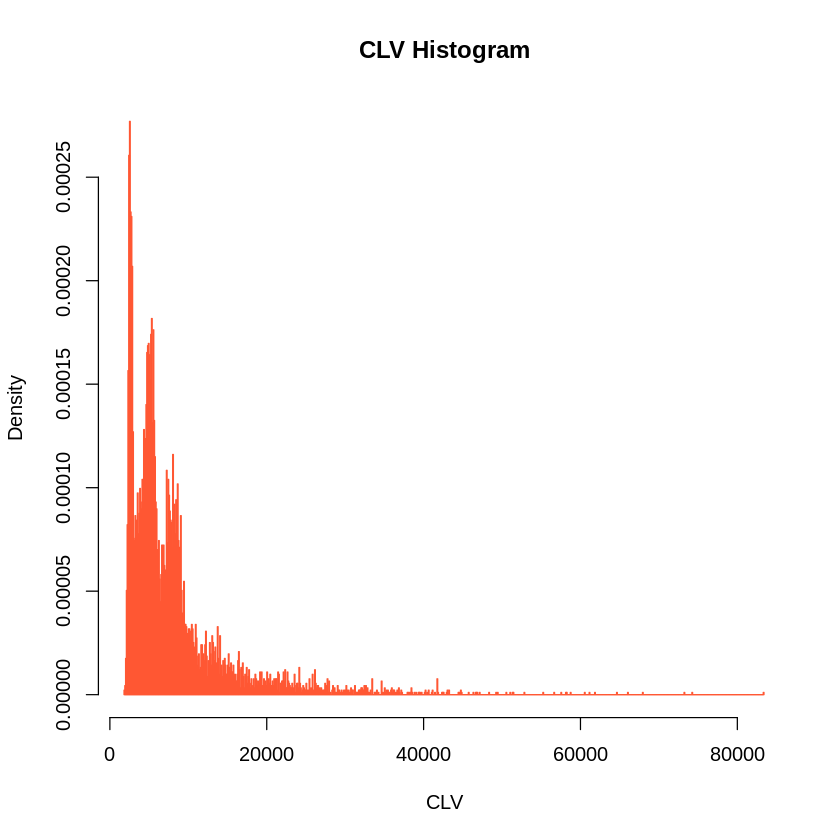

In [ ]:
#hist(InsuranceData$CustomerLifetimeValue, col = "#FF5733", xlab = "CLV")
hist(InsuranceData$CustomerLifetimeValue, breaks = (max(InsuranceData$CustomerLifetimeValue) - min(InsuranceData$CustomerLifetimeValue))/100, freq = FALSE, main = "CLV Histogram", xlab = "CLV", border = "#FF5733")

In [ ]:
head(airquality)

Ozone Solar.R Wind Temp Month Day
1 41    190      7.4 67   5     1  
2 36    118      8.0 72   5     2  
3 12    149     12.6 74   5     3  
4 18    313     11.5 62   5     4  
5 NA     NA     14.3 56   5     5  
6 28     NA     14.9 66   5     6

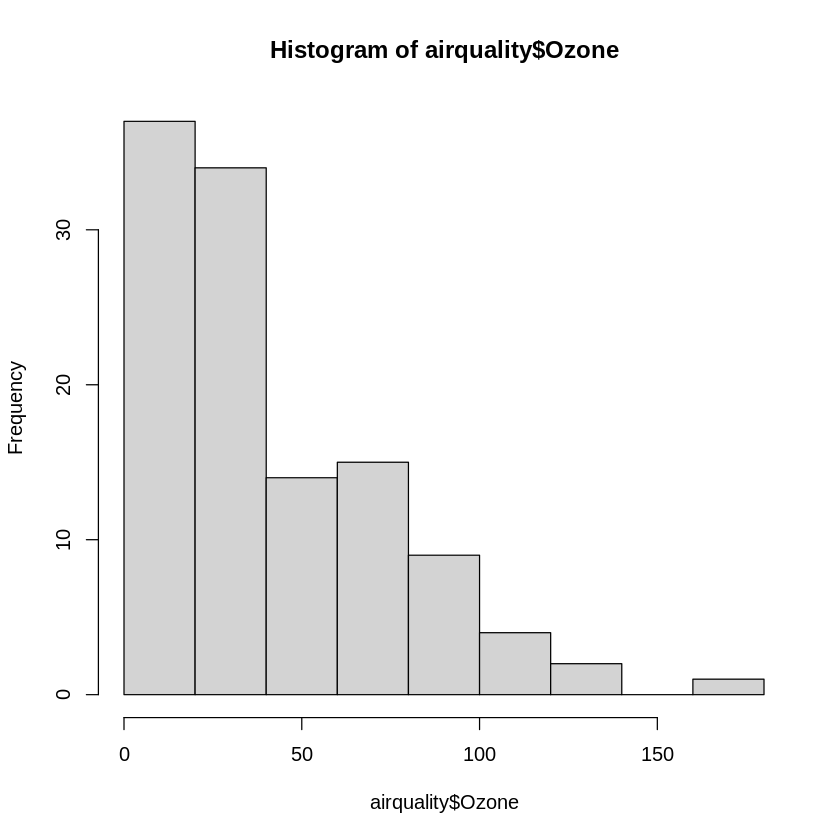

In [ ]:
hist(airquality$Ozone)  ## Draw a new plot

In [ ]:
head(airquality)

Ozone Solar.R Wind Temp Month Day
1 41    190      7.4 67   5     1  
2 36    118      8.0 72   5     2  
3 12    149     12.6 74   5     3  
4 18    313     11.5 62   5     4  
5 NA     NA     14.3 56   5     5  
6 28     NA     14.9 66   5     6

In [ ]:
help(plot)

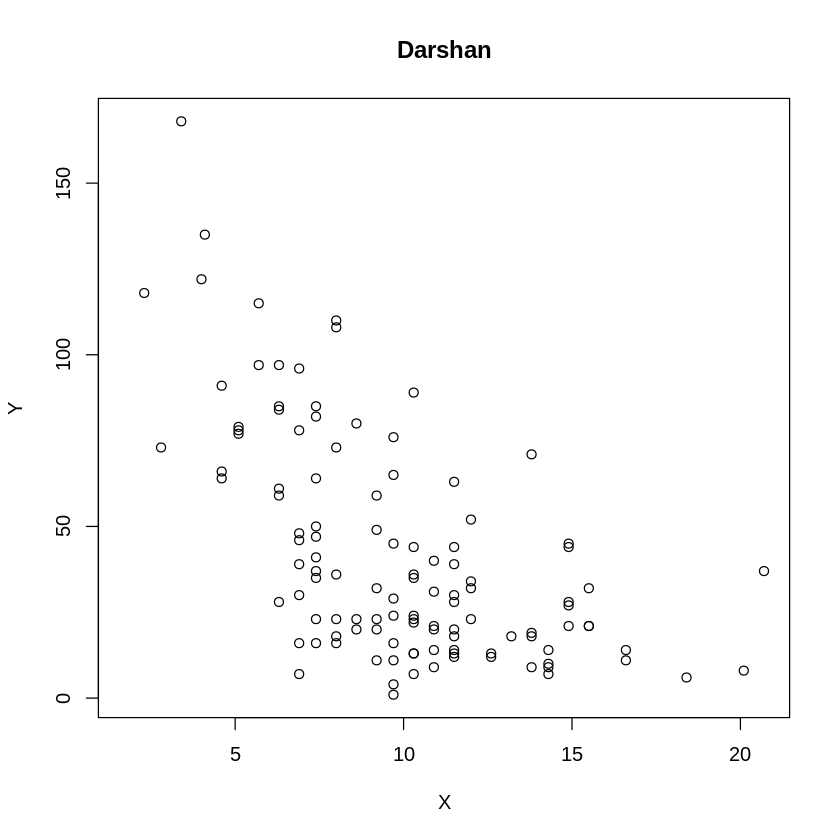

In [ ]:
plot(airquality$Wind, airquality$Ozone, main = "Darshan", xlab = "X", ylab = "Y")

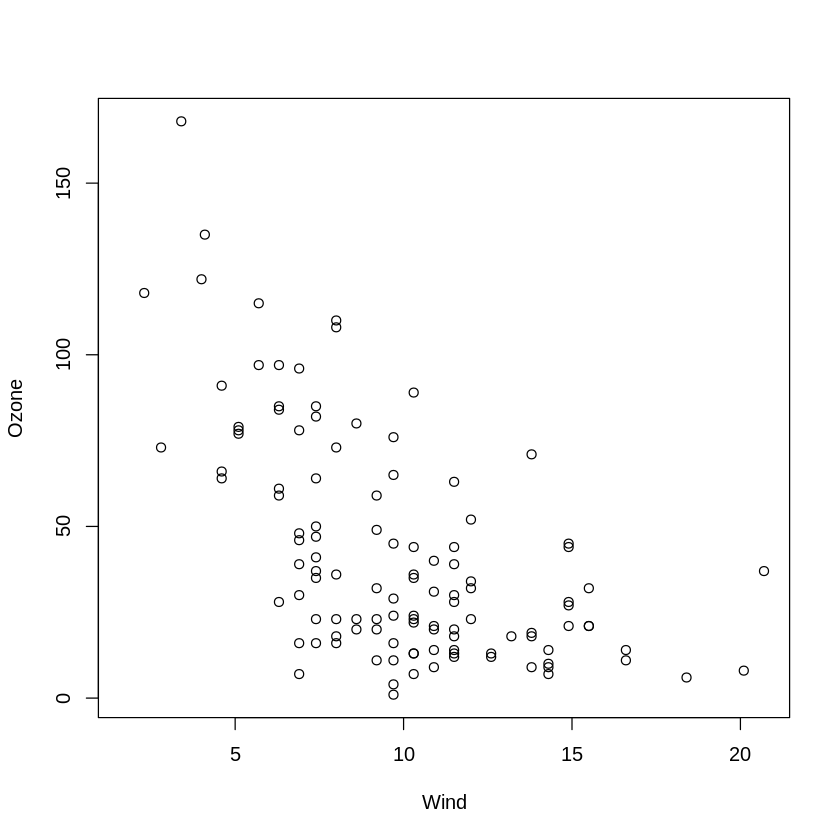

In [ ]:
with(airquality, plot(Wind, Ozone))

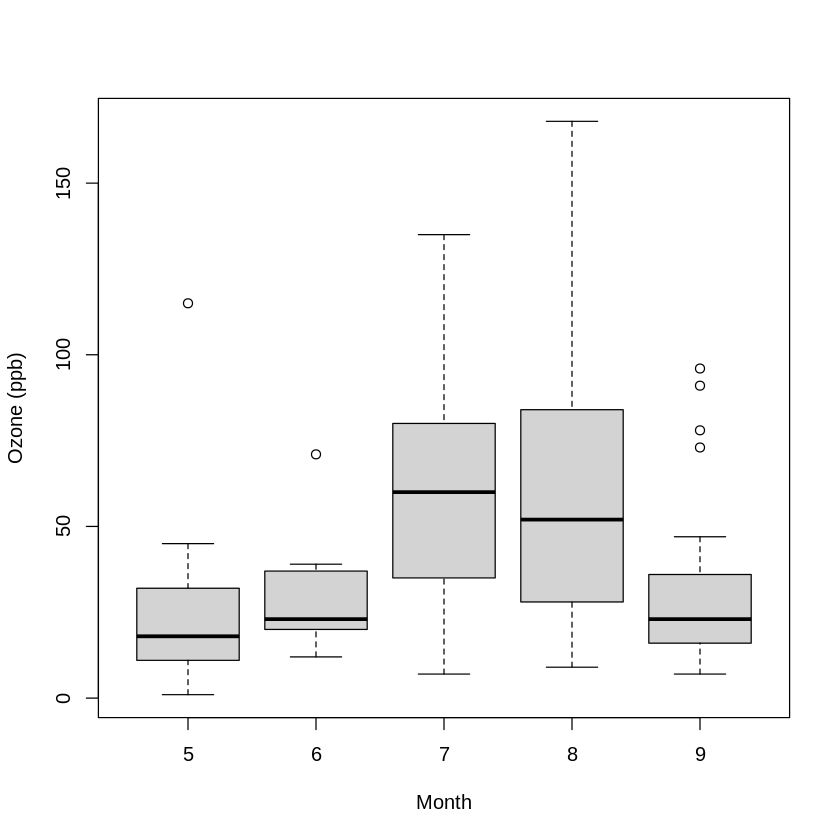

In [ ]:
airquality <- transform(airquality, Month = factor(Month))
boxplot(Ozone ~ Month, airquality, xlab = "Month", ylab = "Ozone (ppb)")

In [ ]:
# https://rstudio-pubs-static.s3.amazonaws.com/84527_6b8334fd3d9348579681b24d156e7e9d.html

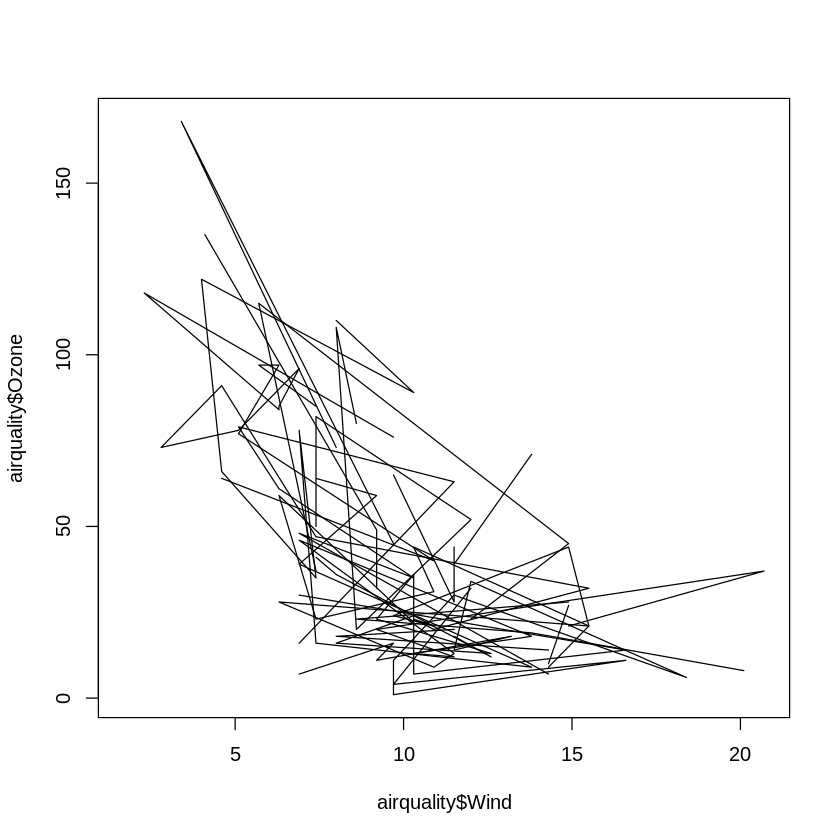

In [ ]:
plot(airquality$Wind, airquality$Ozone, type = "l")     # Try "o" "p" "l" "b"

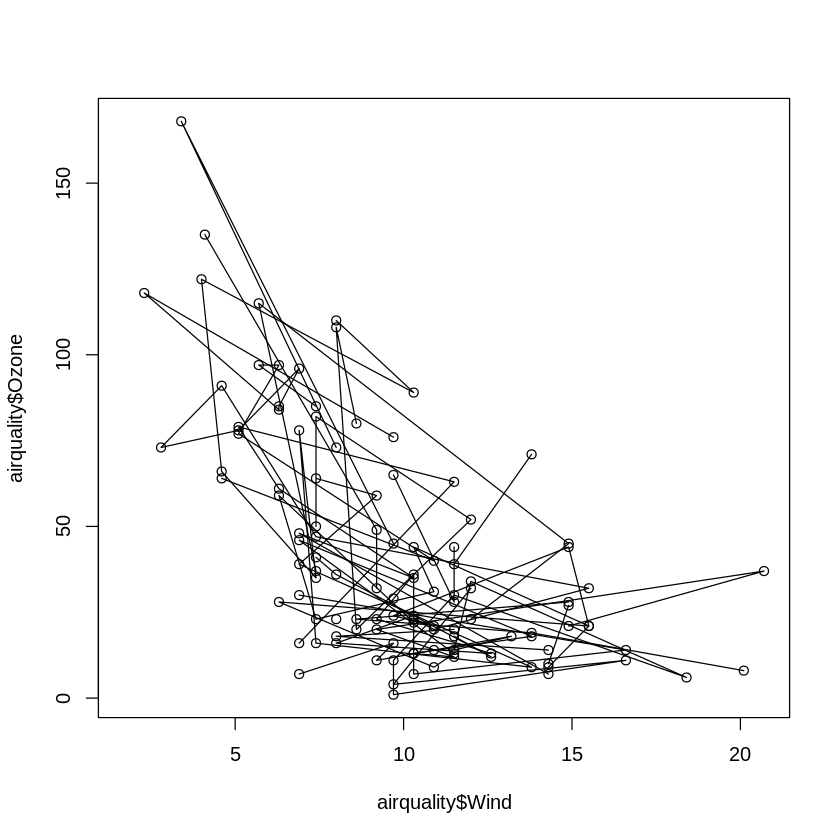

In [ ]:
plot(airquality$Wind, airquality$Ozone, type = "o")     # Try "o" "p" "l" "b"

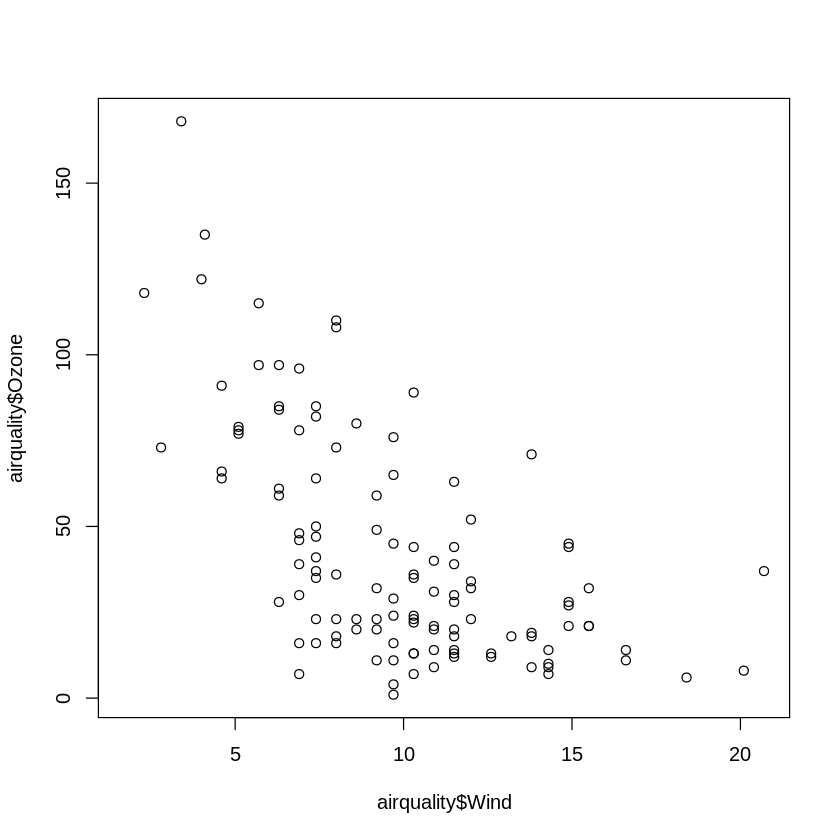

In [ ]:
plot(airquality$Wind, airquality$Ozone, type = "p")     # Try "o" "p" "l" "b"

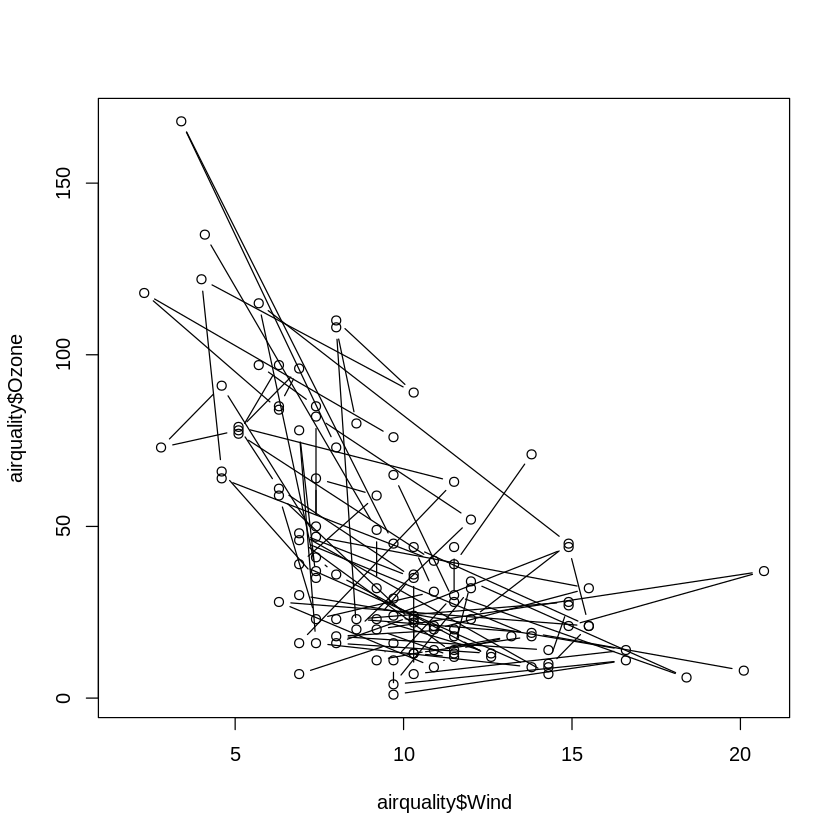

In [ ]:
plot(airquality$Wind, airquality$Ozone, type = "b")     # Try "o" "p" "l" "b"

1. Maximum CLV is $83325.381 and the minimum CLV is $1898.008.
1. Mean of CLV is $8005 and the Median is $5780.
1. The Variance in CLV is 47210196 and the Standard Deviation is 6870.968.
1. Skewness is 4.031284. CLV is positive skewed and most values are concentrated on the left of
1. the mean value, yet all the extreme values are on the right of the mean value.
1. Kurtosis is 13.81163. Since kurtosis > 3, means distribution has thicker tails than normal
1. distribution and have more outliers (extreme values).
1. This means that the distribution of CLV is positively skewed (as expected) and is heavily
1. Leptokurtic.
1. These results indicate a distribution that is heavily skewed with a very large tail.
1. There are a LOT of Customers with low CLV. Very few customers with high CLV.
1. This can be visually understood using the Histogram.

**3.2. Descriptive Analysis of Monthly Premium Auto(MPA)**

[1]  61 298

[1] 93.21929

[1] 34.40797

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  61.00   68.00   83.00   93.22  109.00  298.00 

[1] 1183.908

[1] 2.122849
attr(,"method")
[1] "moment"

[1] 6.187546
attr(,"method")
[1] "excess"

[1] 0.3962617

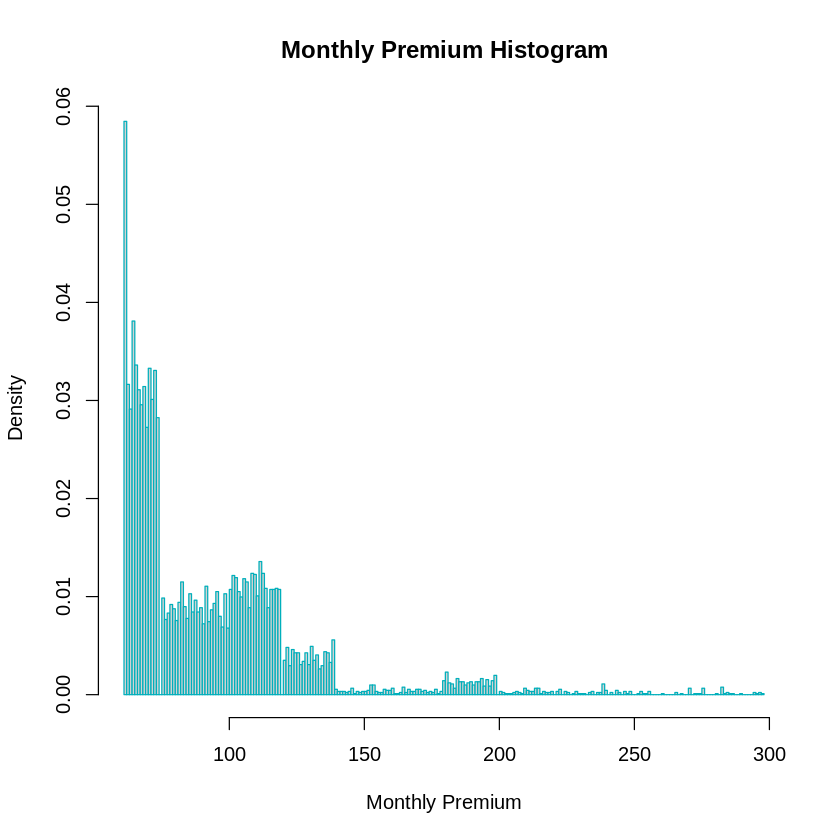

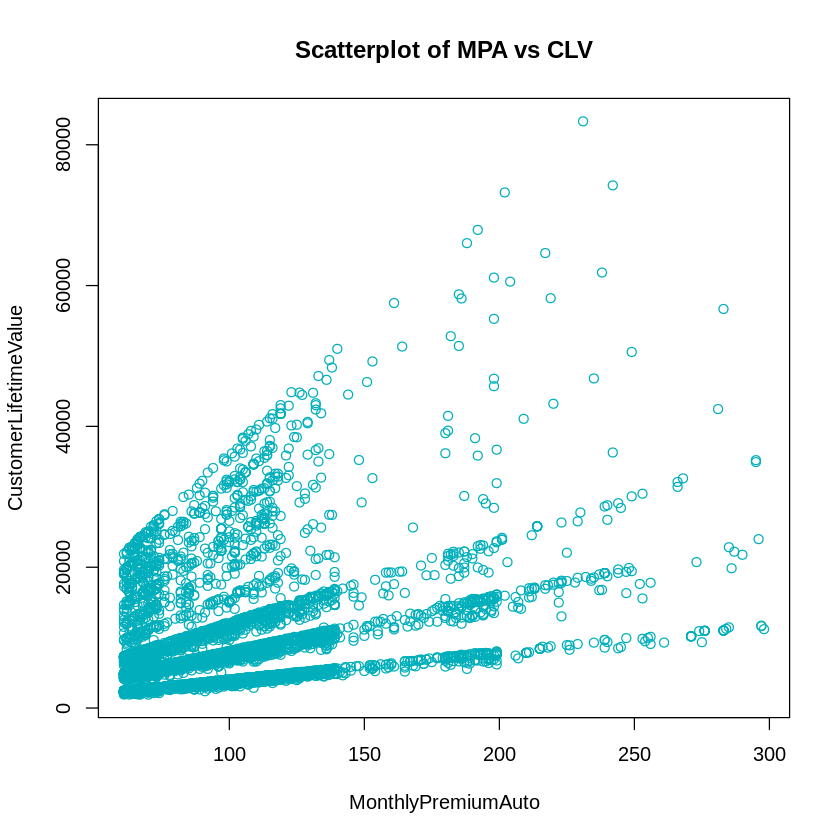

In [ ]:
range(InsuranceData$MonthlyPremiumAuto)
mean(InsuranceData$MonthlyPremiumAuto)
sd(InsuranceData$MonthlyPremiumAuto)
summary(InsuranceData$MonthlyPremiumAuto)
var(InsuranceData$MonthlyPremiumAuto)
skewness(InsuranceData$MonthlyPremiumAuto)
kurtosis(InsuranceData$MonthlyPremiumAuto)
cor(InsuranceData$MonthlyPremiumAuto,InsuranceData$CustomerLifetimeValue)

#hist(InsuranceData$MonthlyPremiumAuto, col = "#00AFBB", xlab = "Monthly Premium Auto")
hist(InsuranceData$MonthlyPremiumAuto, breaks = (max(InsuranceData$MonthlyPremiumAuto) - min(InsuranceData$MonthlyPremiumAuto))/1, freq = FALSE, main = "Monthly Premium Histogram", xlab = "Monthly Premium", border = "#00AFBB")

plot(x=InsuranceData$MonthlyPremiumAuto, y=InsuranceData$CustomerLifetimeValue, col="#00AFBB", cex=1, xlab="MonthlyPremiumAuto", ylab="CustomerLifetimeValue",
       main="Scatterplot of MPA vs CLV")

1. Maximum MPA is 298 and the minimum MPA is 61
1. Mean of MPA is 93.21929 and the Median is 84.00
1. The Variance in MPA is 1183.908 and the Standard Deviation is 34.40797
1. Skewness is 2.122849. MPA is positive skewed and most values are concentrated on the left of
1. the mean value, yet all the extreme values are on the right of the mean value.
1. Kurtosis is 6.187546. Since kurtosis > 3, means distribution has thicker tails than normal
1. distribution and have more outliers (extreme values).
1. There is a Positive Corelation of 39.62 % of MPA with CLV. From scatter plot, it is clearly
1. visible that on MPA, CLV is also Increasing.7.
1. Monthly premiums follow a trend similar to CLV although the distribution is NOT as skewed
1. or as long tailed as CLV. This can be visually seen in the Histogram.

**3.3. Descriptive Analysis ofTotalClaimAmount (TCA)**

[1]    0.099007 2893.239678

[1] 434.0888

[1] 290.5001

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.099  272.258  383.945  434.089  547.515 2893.240 

[1] 84390.3

[1] 1.714403
attr(,"method")
[1] "moment"

[1] 5.973506
attr(,"method")
[1] "excess"

[1] 0.2264509

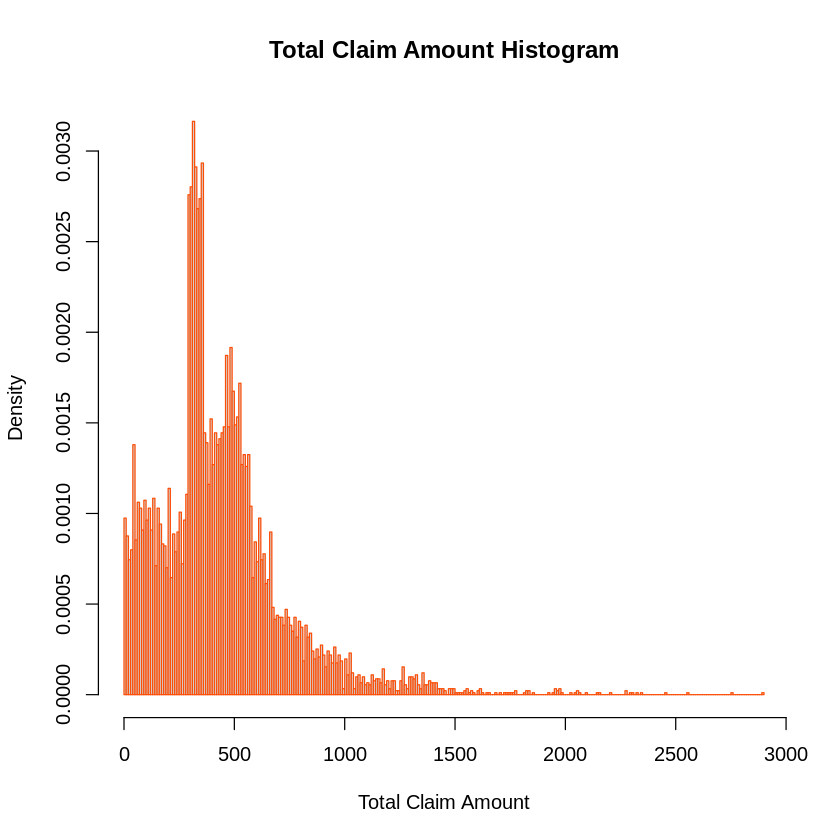

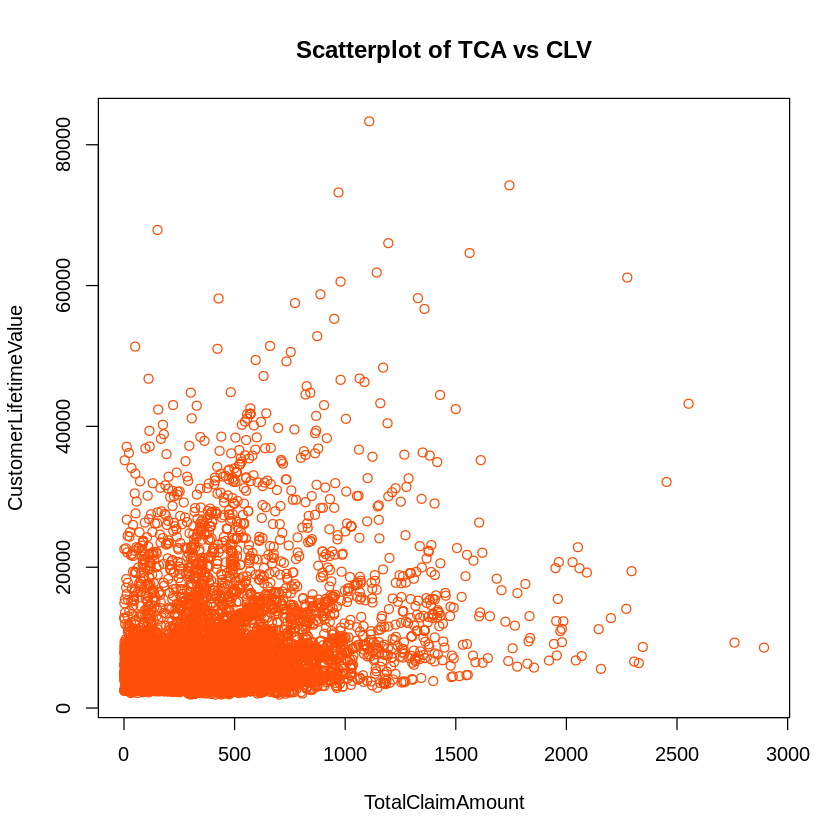

In [ ]:
range(InsuranceData$TotalClaimAmount)
mean(InsuranceData$TotalClaimAmount)
sd(InsuranceData$TotalClaimAmount)
summary(InsuranceData$TotalClaimAmount)
var(InsuranceData$TotalClaimAmount)
skewness(InsuranceData$TotalClaimAmount)
kurtosis(InsuranceData$TotalClaimAmount) 
cor(InsuranceData$TotalClaimAmount,InsuranceData$CustomerLifetimeValue)

#hist(InsuranceData$TotalClaimAmount, col = "#FC4E07", xlab = "Total Claim Amount")
hist(InsuranceData$TotalClaimAmount, breaks = (max(InsuranceData$TotalClaimAmount) - min(InsuranceData$TotalClaimAmount))/10, freq = FALSE, main = "Total Claim Amount Histogram", xlab = "Total Claim Amount", border = "#FC4E07")

plot(x=InsuranceData$TotalClaimAmount, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="TotalClaimAmount", ylab="CustomerLifetimeValue",
     main="Scatterplot of TCA vs CLV")

1. Maximum TCA is $0.099007 and the minimum TCA is $2893.239678
1. Mean of TCA is $434.0888 and the Median is $383.945
1. The Variance in TCA is 84390.3 and the Standard Deviation is 290.5001
1. Skewness is 1.714403. TCA is positive skewed and most values are concentrated on the left of
1. the mean value, yet all the extreme values are on the right of the mean value.
1. Kurtosis is 5.973506. Since kurtosis > 3, means TCA distribution has thicker tails than normal
1. distribution and have more outliers (extreme values).
1. There is a Positive Corelation of 22.65 % of TCA with CLV. From scatter plot, it is clearly
1. visible that on TCA, CLV is also Increasing.
1. Total Claim amounts also follow a trend similar to CLV and MPA although the distribution is
1. NOT as skewed or as long tailed as MPA. This can be visually seen in the Histogram.

**This means that variation in data is CLV > MPA > TCA**

**3.4 Descriptive Analysis of other variables:**

In [ ]:
cor(InsuranceData$Income,InsuranceData$CustomerLifetimeValue)


[1] 0.02436566

[1] 0.02436566

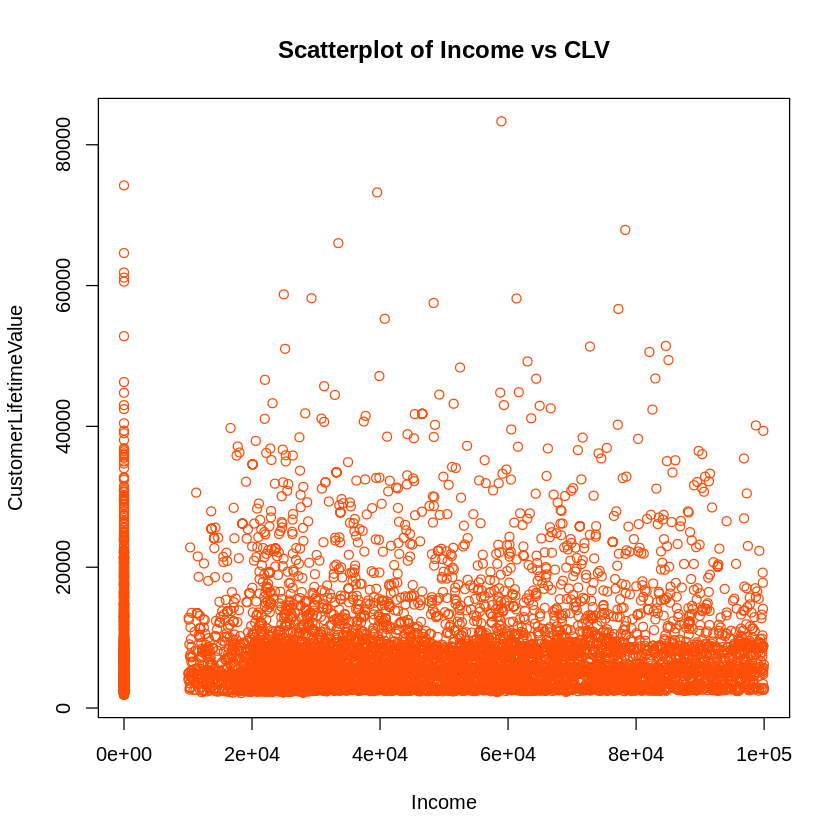

In [ ]:
plot(x=InsuranceData$Income, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="Income", ylab="CustomerLifetimeValue",main="Scatterplot of Income vs CLV")

[1] 0.01151668

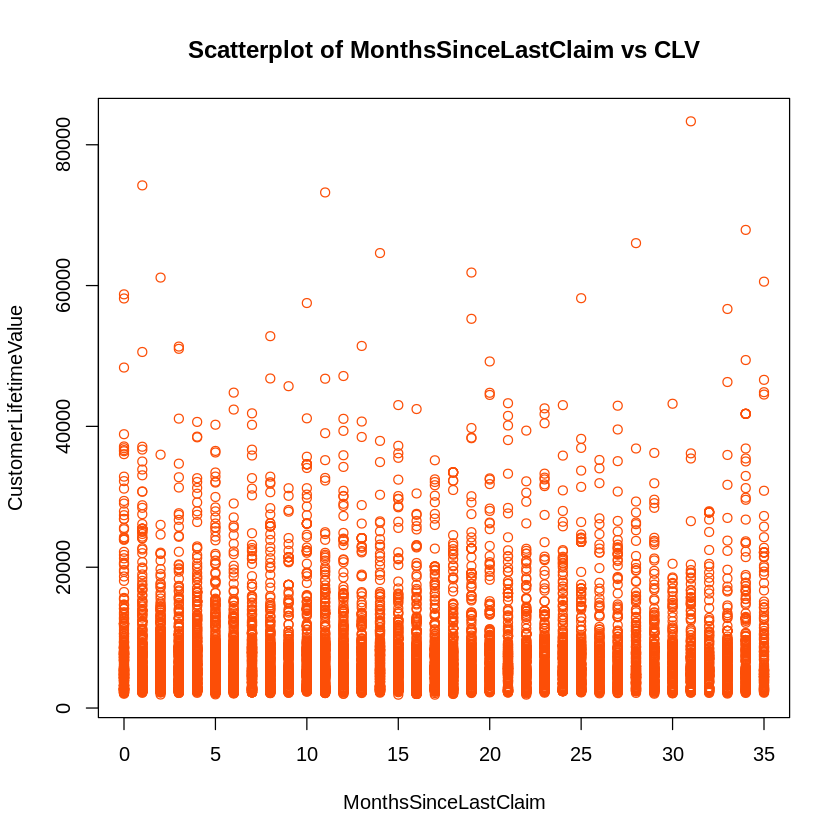

In [ ]:
cor(InsuranceData$MonthsSinceLastClaim,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$MonthsSinceLastClaim, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="MonthsSinceLastClaim", ylab="CustomerLifetimeValue",main="Scatterplot of MonthsSinceLastClaim vs CLV")

[1] 0.009418381

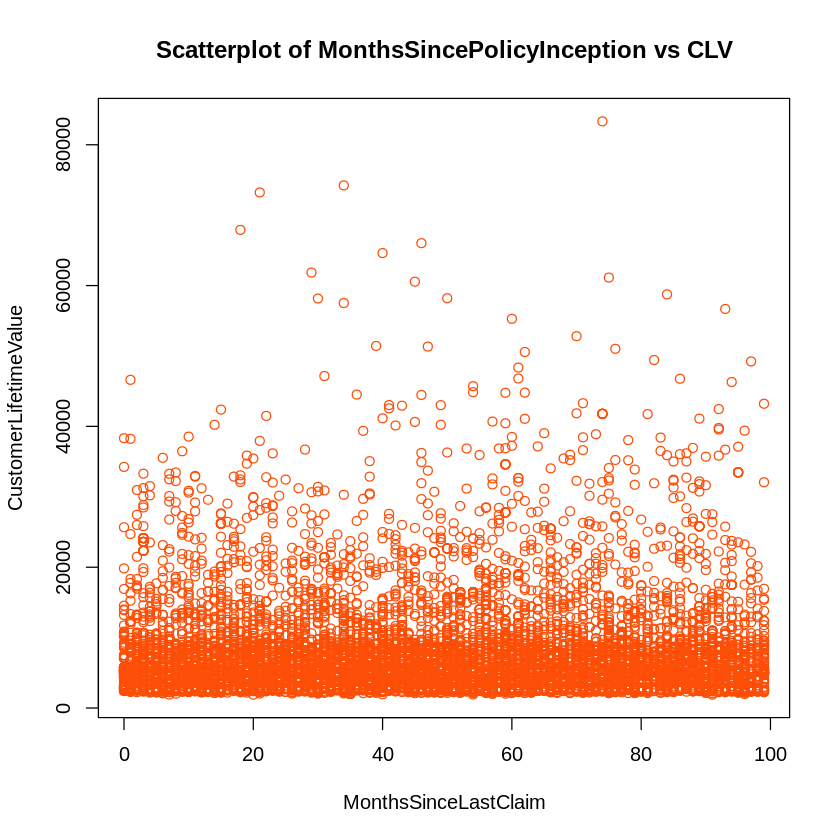

In [ ]:
cor(InsuranceData$MonthsSincePolicyInception,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$MonthsSincePolicyInception, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="MonthsSinceLastClaim", ylab="CustomerLifetimeValue",main="Scatterplot of MonthsSincePolicyInception vs CLV")

[1] -0.03634319

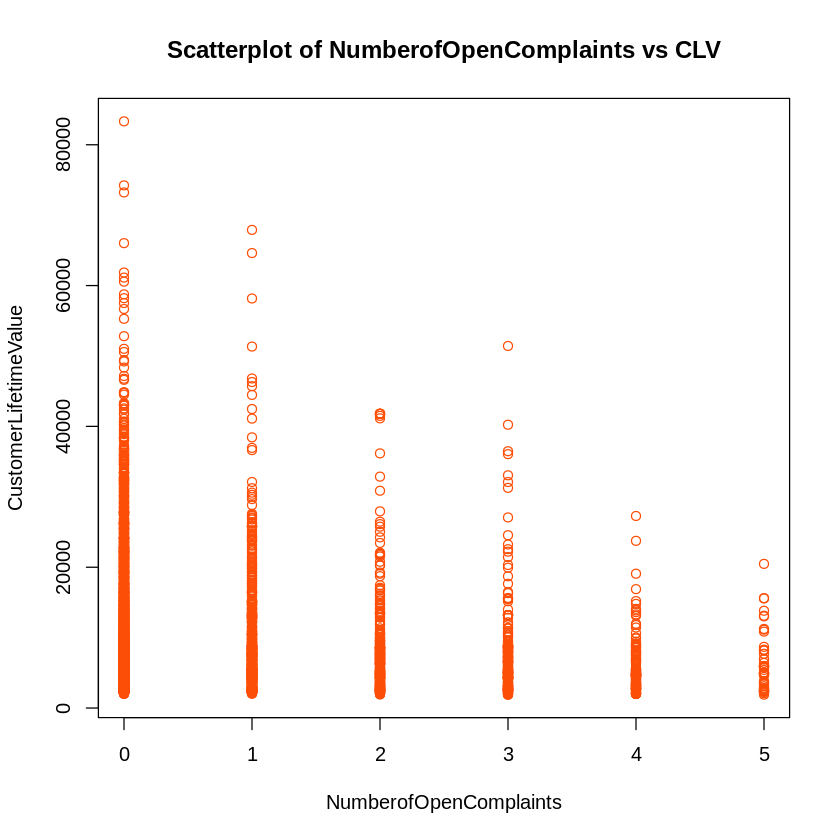

In [ ]:
cor(InsuranceData$NumberofOpenComplaints,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$NumberofOpenComplaints, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="NumberofOpenComplaints", ylab="CustomerLifetimeValue",main="Scatterplot of NumberofOpenComplaints vs CLV")

[1] 0.02195536

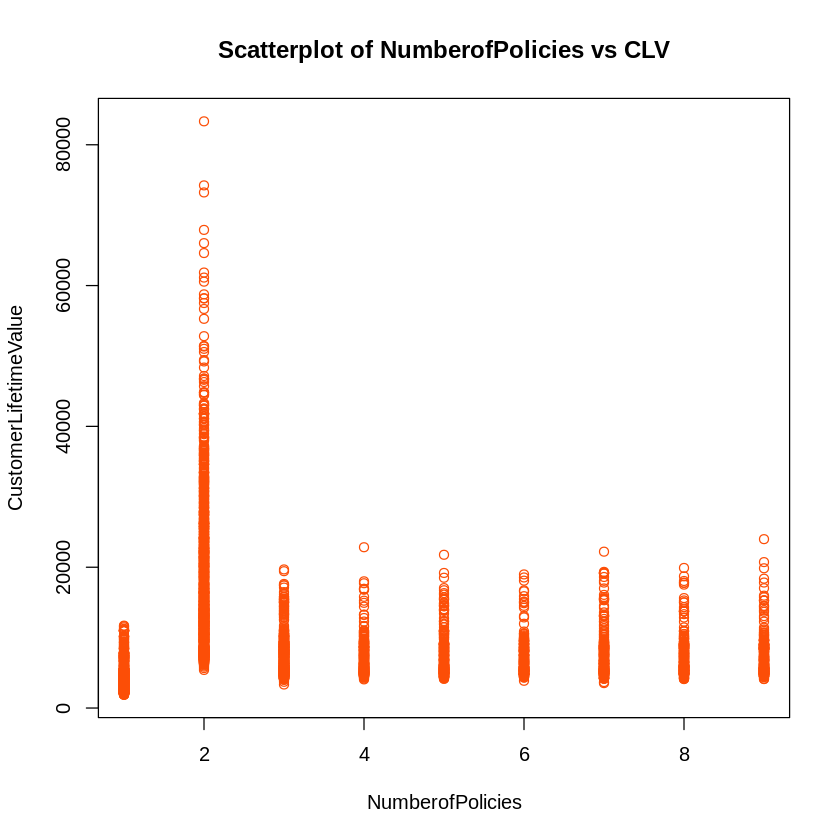

In [ ]:
cor(InsuranceData$NumberofPolicies,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$NumberofPolicies, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="NumberofPolicies", ylab="CustomerLifetimeValue",main="Scatterplot of NumberofPolicies vs CLV")

**The positive correlation values close to zero show that that there is no strong relationship of Income, MonthsSinceLastClaim, NumberofPolicies etc with CLV.
**

* # 4. Inferential Statistics

The most obvious candidate for Dependent Variable is CLV (CustomerLifetimeValue).
This also makes sense from a Business Perspective as we want to understand what contributes to
making a high value customer (Descriptive analysis) and maybe later on predict who is going to be
high value customer (Predictive analysis)

**4.01 Effect of Insurance Coverage on Customer Life Time Value (CLV)**


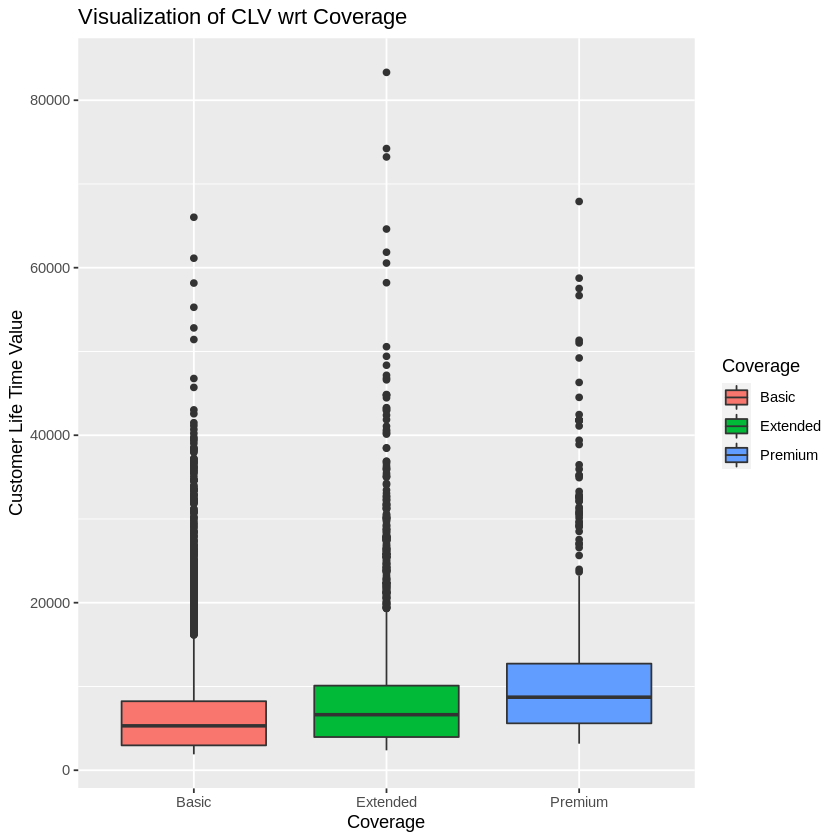

In [ ]:
ggplot(InsuranceData, aes(x=Coverage, y= CustomerLifetimeValue, fill = Coverage)) + 
  geom_boxplot() + 
  labs(x="Coverage",y = "Customer Life Time Value", fill="Coverage") + 
  ggtitle("Visualization of CLV wrt Coverage")


In [ ]:
help(aggregate)

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(Coverage = InsuranceData$Coverage), FUN = sum)
aggData

Coverage x       
1 Basic    40037853
2 Extended 24101296
3 Premium   8977977

In [ ]:
stat(aggData$x)

[1] 40037853 24101296  8977977

In [ ]:
prop.table(stat(aggData$x))

[1] 0.5475852 0.3296259 0.1227890

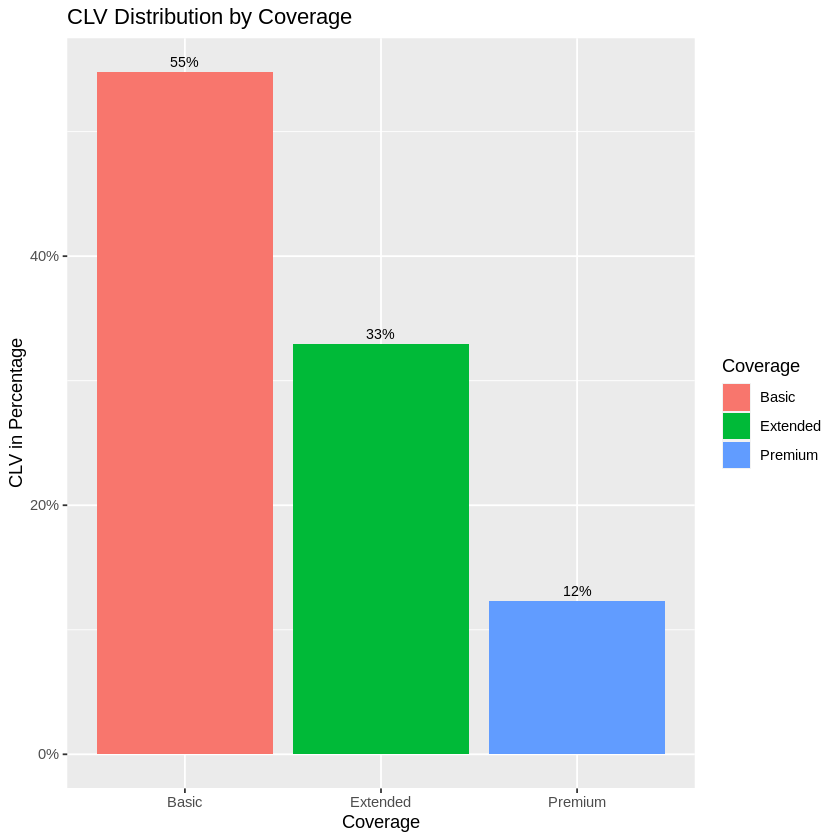

In [ ]:
ggplot(data = aggData, aes(x = Coverage, y = prop.table(stat(aggData$x)), fill = Coverage, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Coverage', y = 'CLV in Percentage', fill = 'Coverage') + 
  ggtitle("CLV Distribution by Coverage")

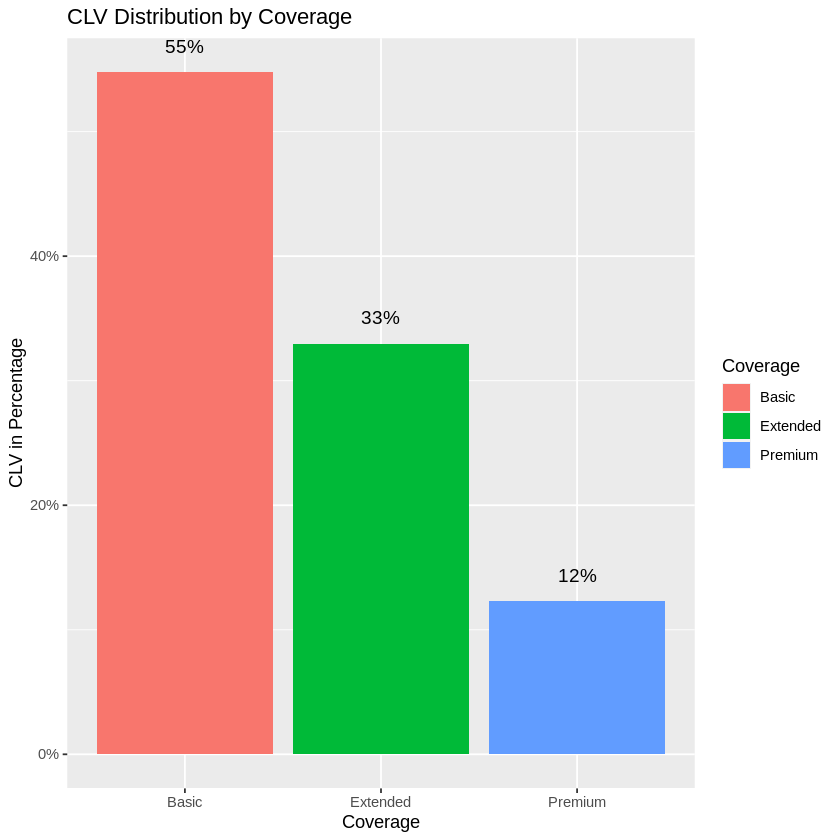

In [ ]:
ggplot(data = aggData, aes(x = Coverage, y = prop.table(stat(aggData$x)), fill = Coverage, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.3),  vjust = -1.5, size = 4) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Coverage', y = 'CLV in Percentage', fill = 'Coverage') + 
  ggtitle("CLV Distribution by Coverage")

Customers who have taken Basic Insurance for their vehicals are more valuable then Extended or
Premium Insurance Policy holders.

**4.02 Effect of Education on Customer Life Time Value (CLV)**

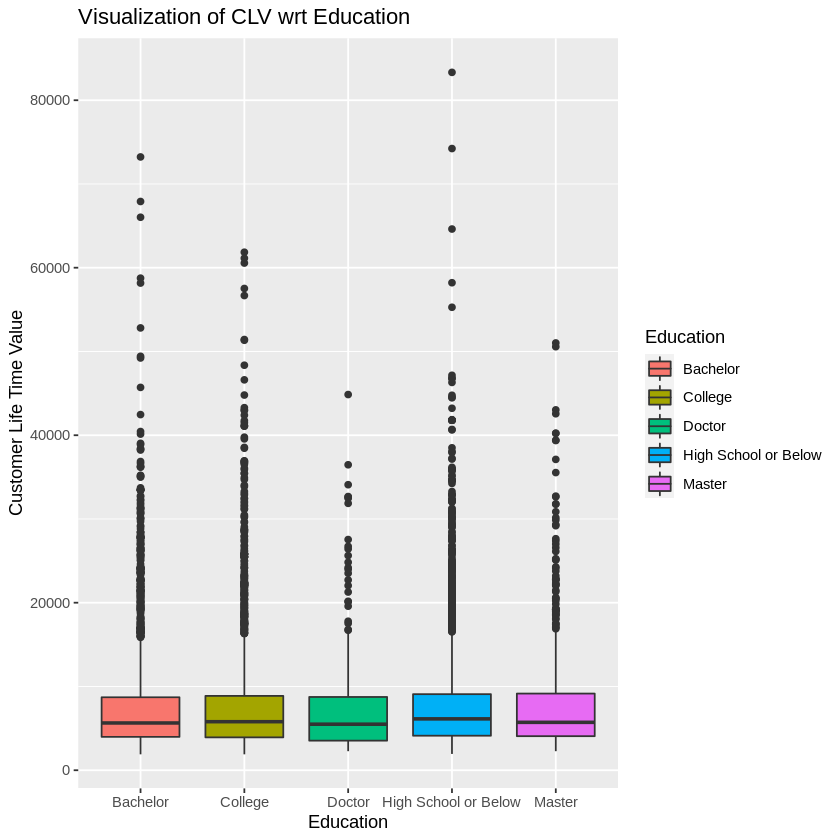

In [ ]:
ggplot(InsuranceData, aes(x=Education, y= CustomerLifetimeValue, fill = Education)) + 
  geom_boxplot() + 
  labs(x="Education",y = "Customer Life Time Value", fill="Education") + 
  ggtitle("Visualization of CLV wrt Education")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(Education = InsuranceData$Education), FUN = sum)
print(aggData)

             Education        x
1             Bachelor 21634071
2              College 21048704
3               Doctor  2571958
4 High School or Below 21753971
5               Master  6108422


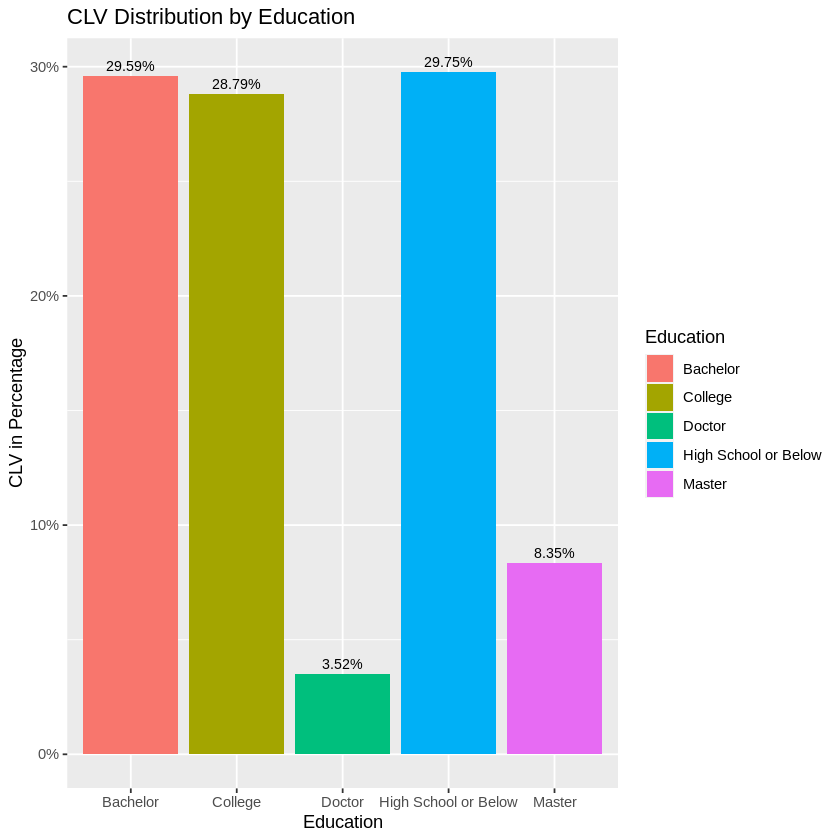

In [ ]:

ggplot(data = aggData, aes(x = Education, y = prop.table(stat(aggData$x)), fill = Education, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Education', y = 'CLV in Percentage', fill = 'Education') + 
  ggtitle("CLV Distribution by Education")

Educated customers (with a bachelors or equivalent degree) are more valuable than others.

**4.03 Effect of Employment Status on Customer Life Time Value (CLV)**

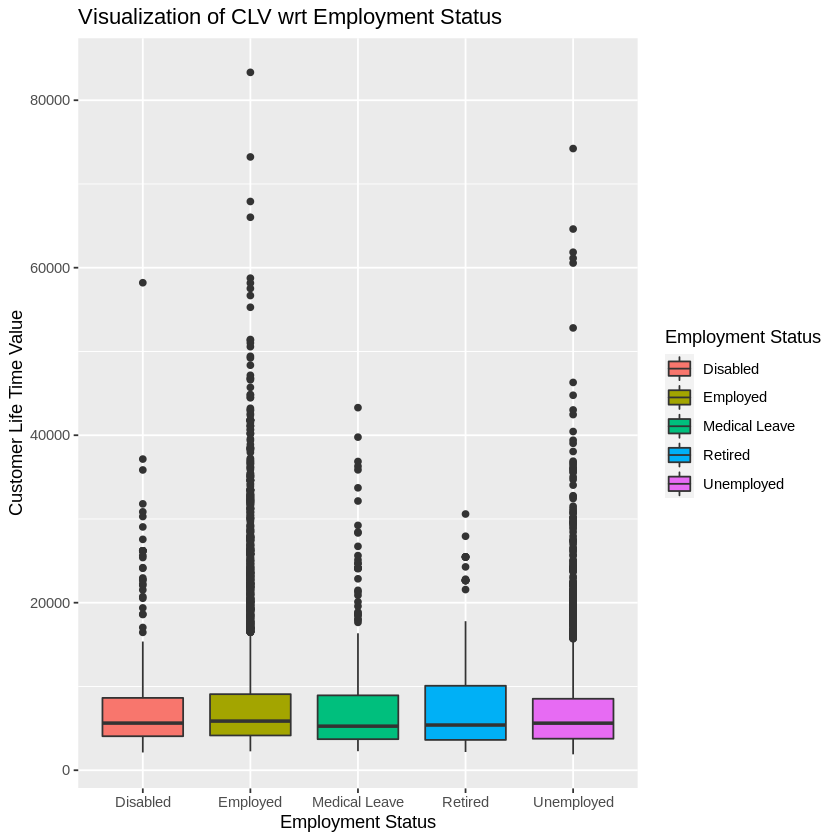

In [ ]:
ggplot(InsuranceData, aes(x=EmploymentStatus, y= CustomerLifetimeValue, fill = EmploymentStatus)) + 
  geom_boxplot() + 
  labs(x="Employment Status",y = "Customer Life Time Value", fill="Employment Status") + 
  ggtitle("Visualization of CLV wrt Employment Status")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(EmploymentStatus = InsuranceData$EmploymentStatus), FUN = sum)
print(aggData)

  EmploymentStatus        x
1         Disabled  3178395
2         Employed 46832533
3    Medical Leave  3301267
4          Retired  2111578
5       Unemployed 17693353


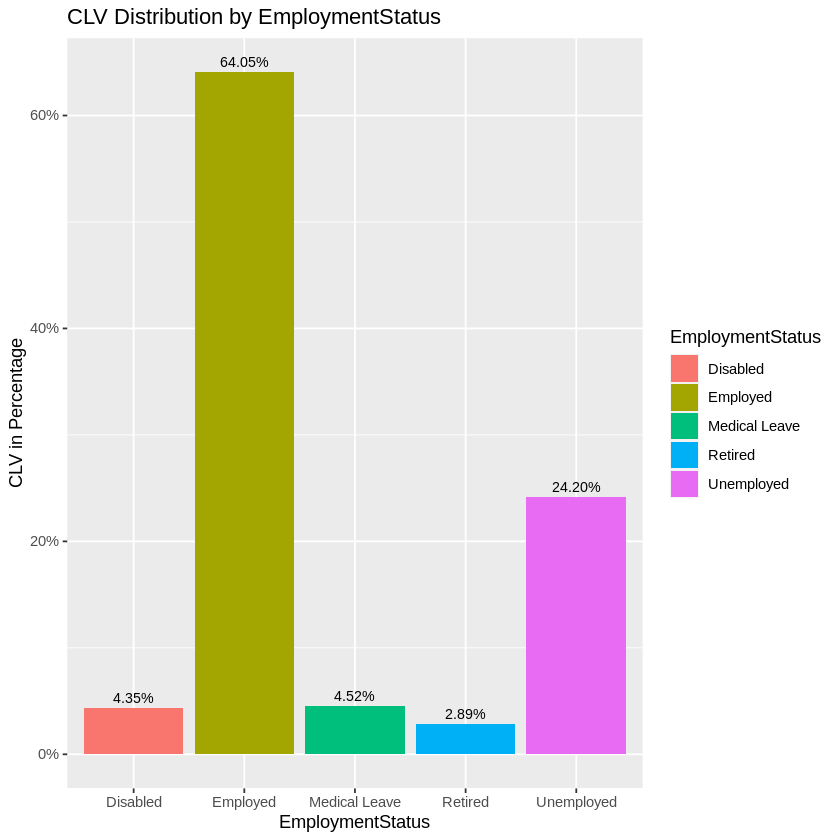

In [ ]:

ggplot(data = aggData, aes(x = EmploymentStatus, y = prop.table(stat(aggData$x)), fill = EmploymentStatus, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'EmploymentStatus', y = 'CLV in Percentage', fill = 'EmploymentStatus') + 
  ggtitle("CLV Distribution by EmploymentStatus")

Employed customers are more valuable than others as compared to Retired, Unemployed or Disabled
Customers.

**4.04 Effect of Gender on Customer Life Time Value (CLV)**

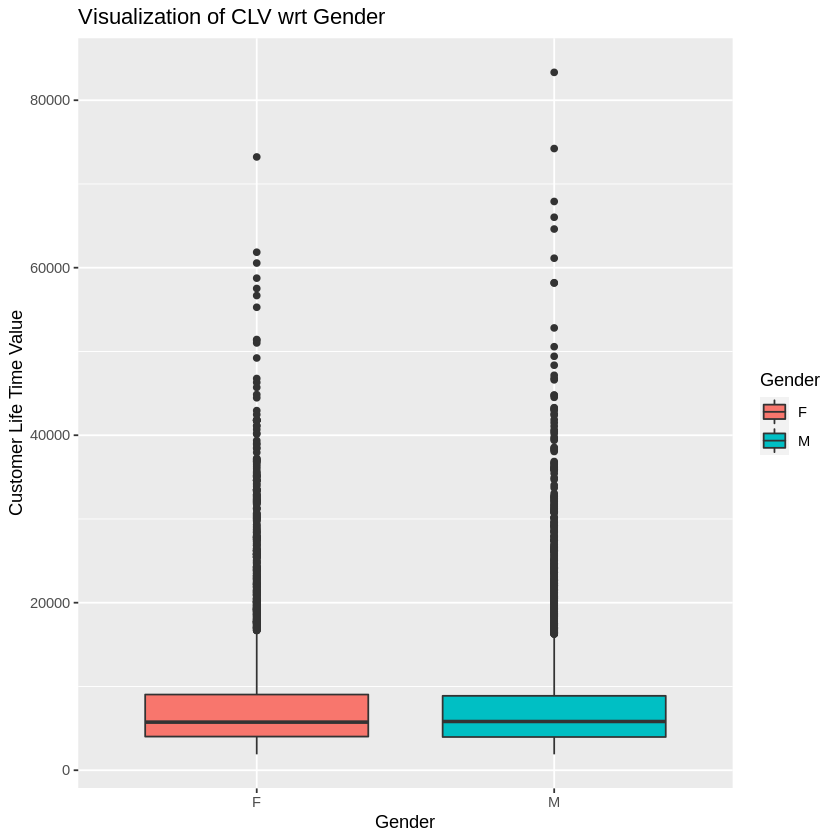

In [ ]:
ggplot(InsuranceData, aes(x=Gender, y= CustomerLifetimeValue, fill = Gender)) + 
  geom_boxplot() + 
  labs(x="Gender",y = "Customer Life Time Value", fill="Gender") + 
  ggtitle("Visualization of CLV wrt Gender")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(Gender = InsuranceData$Gender), FUN = sum)
print(aggData)

  Gender        x
1      F 37713974
2      M 35403152


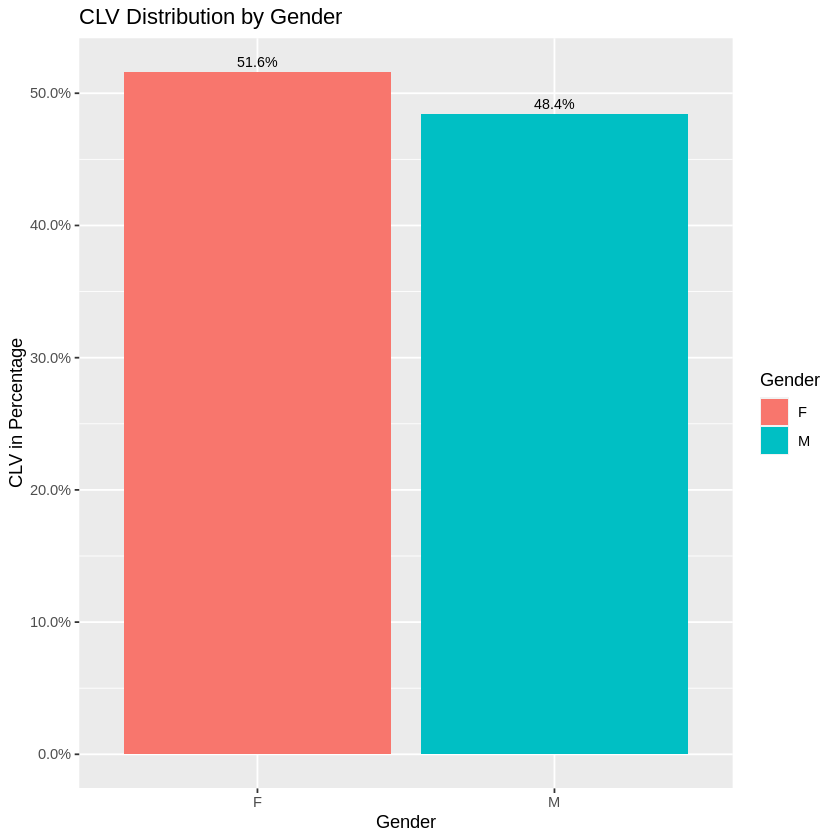

In [ ]:

ggplot(data = aggData, aes(x = Gender, y = prop.table(stat(aggData$x)), fill = Gender, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Gender', y = 'CLV in Percentage', fill = 'Gender') + 
  ggtitle("CLV Distribution by Gender")

Gender has no role to play in determining the value of a customer. Both Male and Female looks
valuable.

**4.05 Effect of Location on Customer Life Time Value (CLV)**

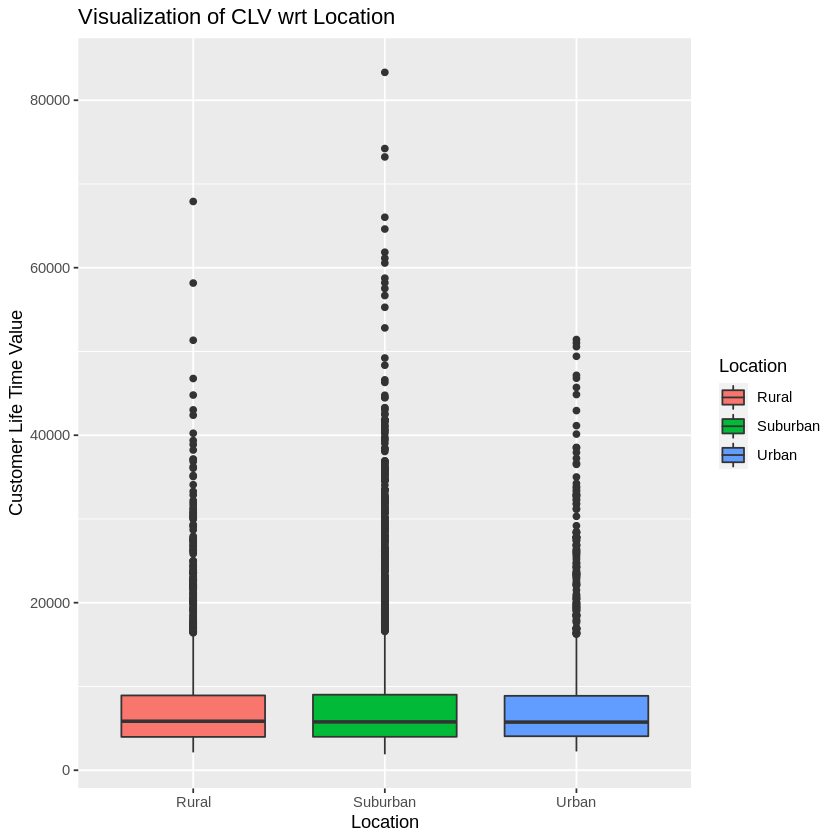

In [ ]:
ggplot(InsuranceData, aes(x=LocationCode, y= CustomerLifetimeValue, fill = LocationCode)) + 
  geom_boxplot() + 
  labs(x="Location",y = "Customer Life Time Value", fill="Location") + 
  ggtitle("Visualization of CLV wrt Location")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(LocationCode = InsuranceData$LocationCode), FUN = sum)
print(aggData)

  LocationCode        x
1        Rural 14101909
2     Suburban 46257759
3        Urban 12757458


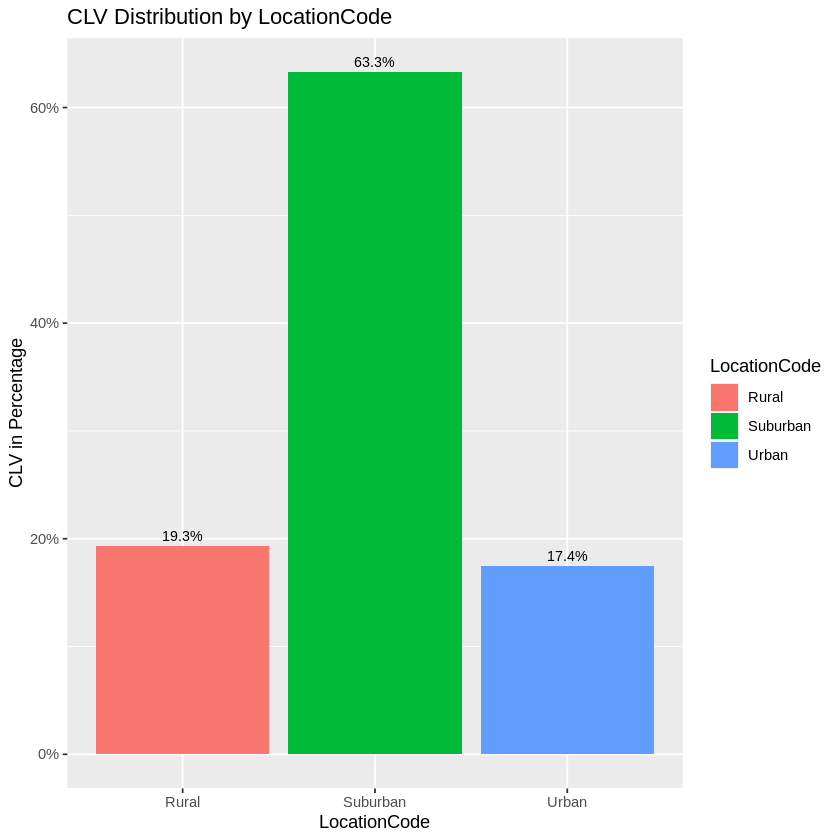

In [ ]:

ggplot(data = aggData, aes(x = LocationCode, y = prop.table(stat(aggData$x)), fill = LocationCode, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'LocationCode', y = 'CLV in Percentage', fill = 'LocationCode') + 
  ggtitle("CLV Distribution by LocationCode")

Rural customers are LESS valuable than Urban customers.

**4.06 Effect of Marital Status on Customer Life Time Value (CLV)**

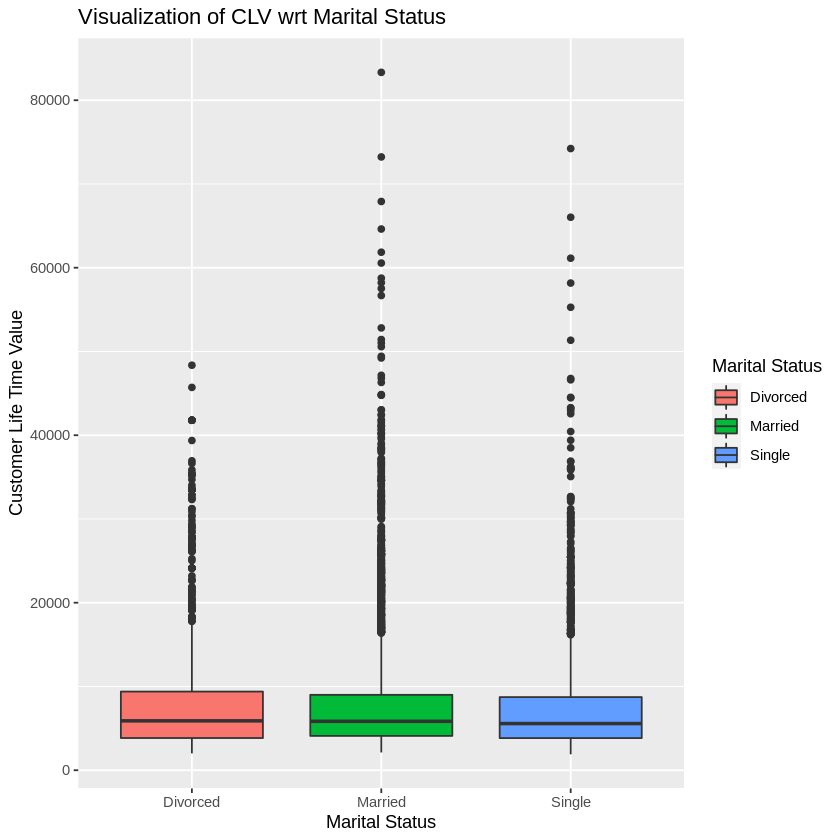

In [ ]:
ggplot(InsuranceData, aes(x=MaritalStatus, y= CustomerLifetimeValue, fill = MaritalStatus)) + 
  geom_boxplot() + 
  labs(x="Marital Status",y = "Customer Life Time Value", fill="Marital Status") + 
  ggtitle("Visualization of CLV wrt Marital Status")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(MaritalStatus = InsuranceData$MaritalStatus), FUN = sum)
print(aggData)

  MaritalStatus        x
1      Divorced 11282256
2       Married 42802367
3        Single 19032503


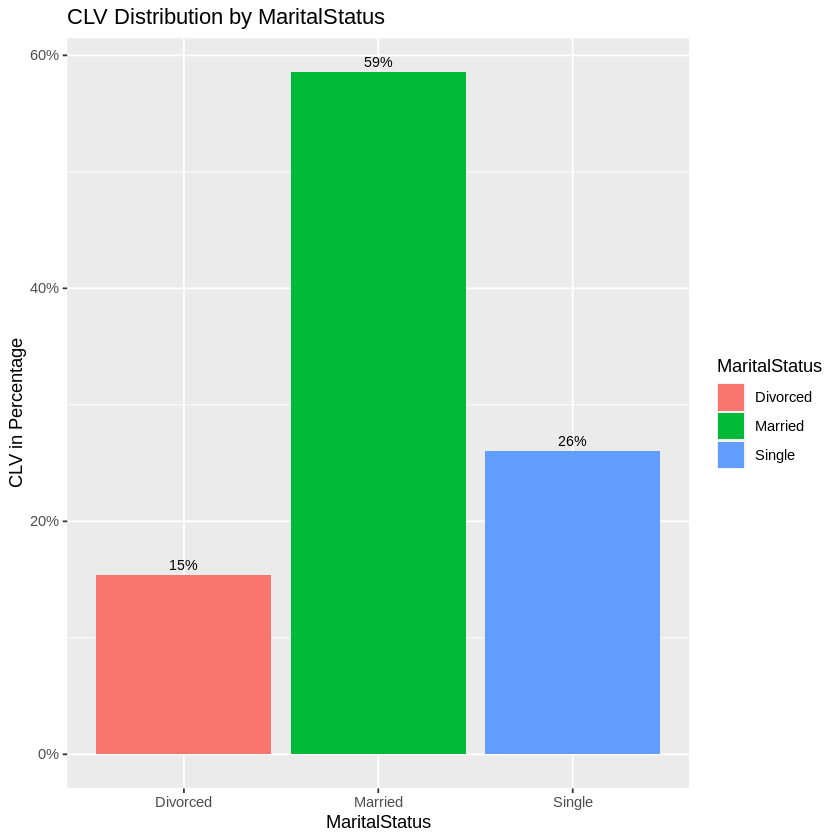

In [ ]:

ggplot(data = aggData, aes(x = MaritalStatus, y = prop.table(stat(aggData$x)), fill = MaritalStatus, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'MaritalStatus', y = 'CLV in Percentage', fill = 'MaritalStatus') + 
  ggtitle("CLV Distribution by MaritalStatus")

Married customers are buying more auto insurance and adding more value to company.

**4.07 Effect of Policy Type on Customer Life Time Value (CLV)**

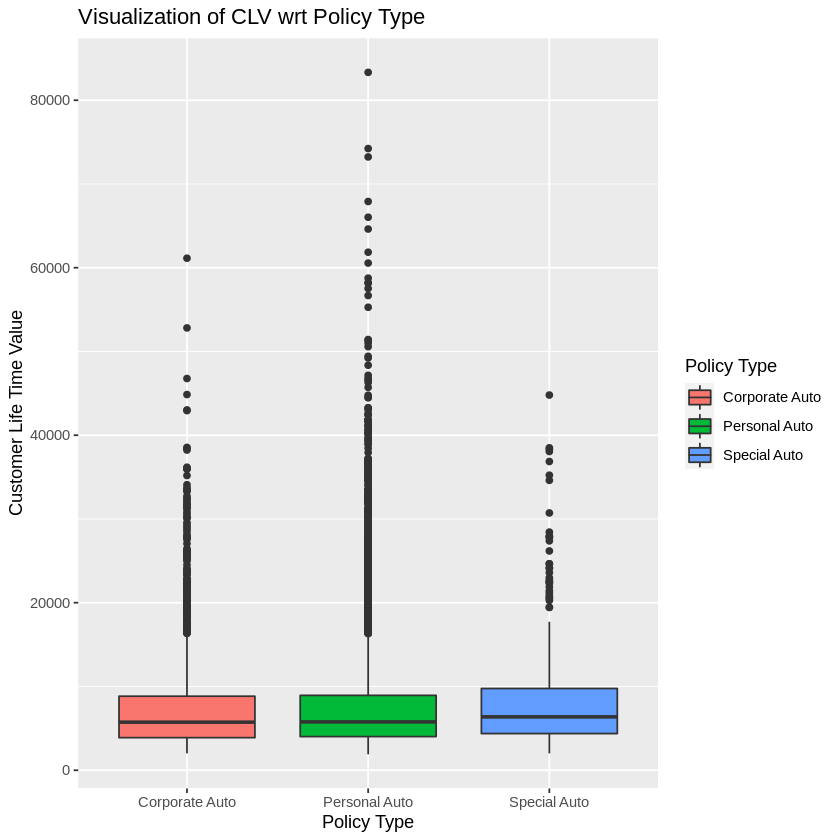

In [ ]:
ggplot(InsuranceData, aes(x=PolicyType, y= CustomerLifetimeValue, fill = PolicyType)) + 
  geom_boxplot() + 
  labs(x="Policy Type",y = "Customer Life Time Value", fill="Policy Type") + 
  ggtitle("Visualization of CLV wrt Policy Type")


In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(PolicyType = InsuranceData$PolicyType), FUN = sum)
print(aggData)

      PolicyType        x
1 Corporate Auto 15378758
2  Personal Auto 54489744
3   Special Auto  3248625


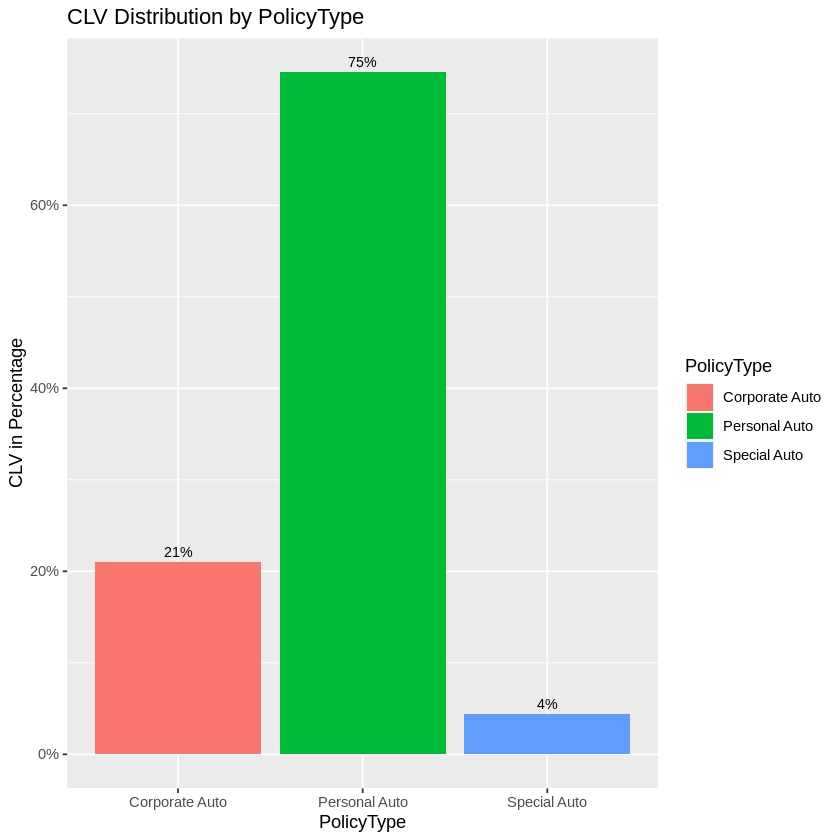

In [ ]:

ggplot(data = aggData, aes(x = PolicyType, y = prop.table(stat(aggData$x)), fill = PolicyType, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'PolicyType', y = 'CLV in Percentage', fill = 'PolicyType') + 
  ggtitle("CLV Distribution by PolicyType")

Customers having thier own Persoanl Policy are more valuable to company then Corporate and Special
Insurance policy holder.

**4.08 Effect of Renew Offer Type on Customer Life Time Value (CLV)**

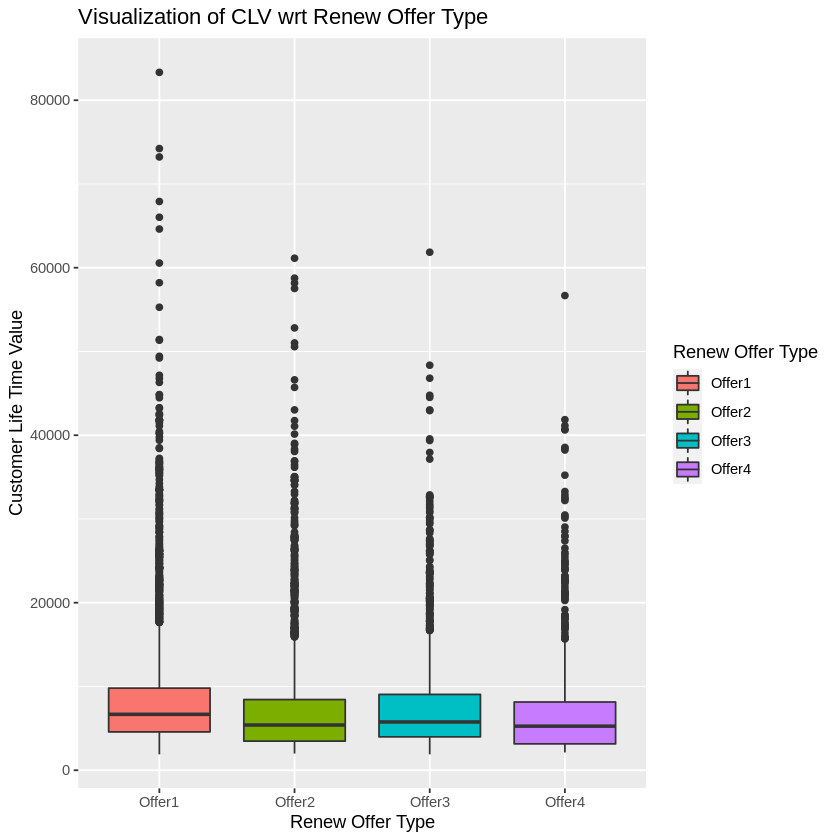

In [ ]:
ggplot(InsuranceData, aes(x=RenewOfferType, y= CustomerLifetimeValue, fill = RenewOfferType)) + 
  geom_boxplot() + 
  labs(x="Renew Offer Type",y = "Customer Life Time Value", fill="Renew Offer Type") + 
  ggtitle("Visualization of CLV wrt Renew Offer Type")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(RenewOfferType = InsuranceData$RenewOfferType), FUN = sum)
print(aggData)

  RenewOfferType        x
1         Offer1 32668985
2         Offer2 21642902
3         Offer3 11452973
4         Offer4  7352266


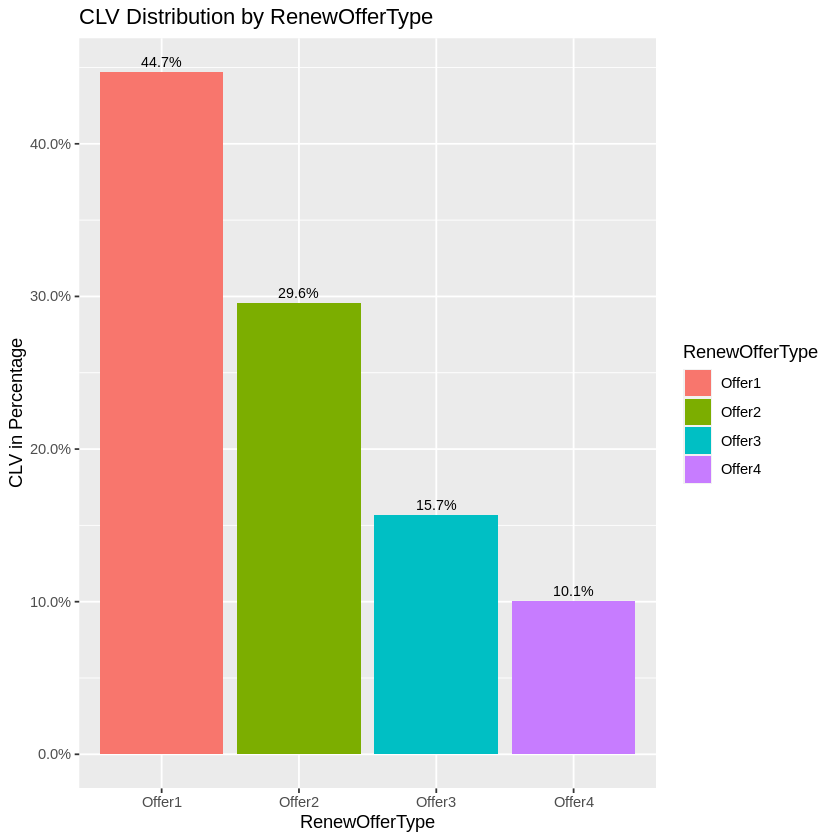

In [ ]:

ggplot(data = aggData, aes(x = RenewOfferType, y = prop.table(stat(aggData$x)), fill = RenewOfferType, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'RenewOfferType', y = 'CLV in Percentage', fill = 'RenewOfferType') + 
  ggtitle("CLV Distribution by RenewOfferType")

Offers 1 and Offer 2 attracts more customers.

**4.09 Effect of Sales Channel on Customer Life Time Value (CLV)**

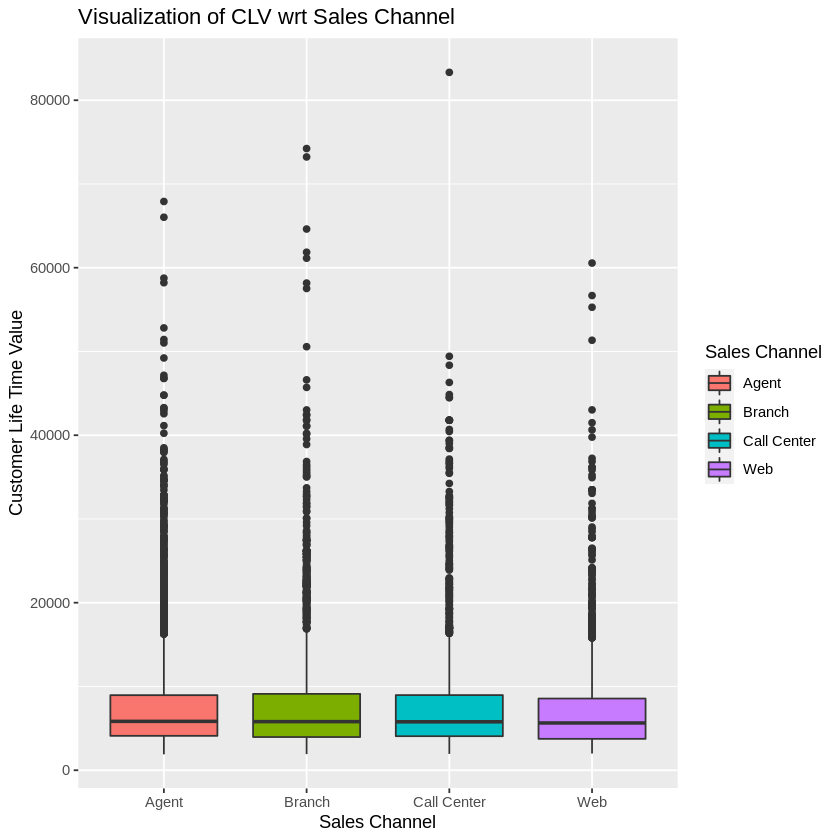

In [ ]:
ggplot(InsuranceData, aes(x=SalesChannel, y= CustomerLifetimeValue, fill = SalesChannel)) + 
  geom_boxplot() + 
  labs(x="Sales Channel",y = "Customer Life Time Value", fill="Sales Channel") + 
  ggtitle("Visualization of CLV wrt Sales Channel")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(SalesChannel = InsuranceData$SalesChannel), FUN = sum)
print(aggData)

  SalesChannel        x
1        Agent 27668955
2       Branch 20843300
3  Call Center 14296651
4          Web 10308219


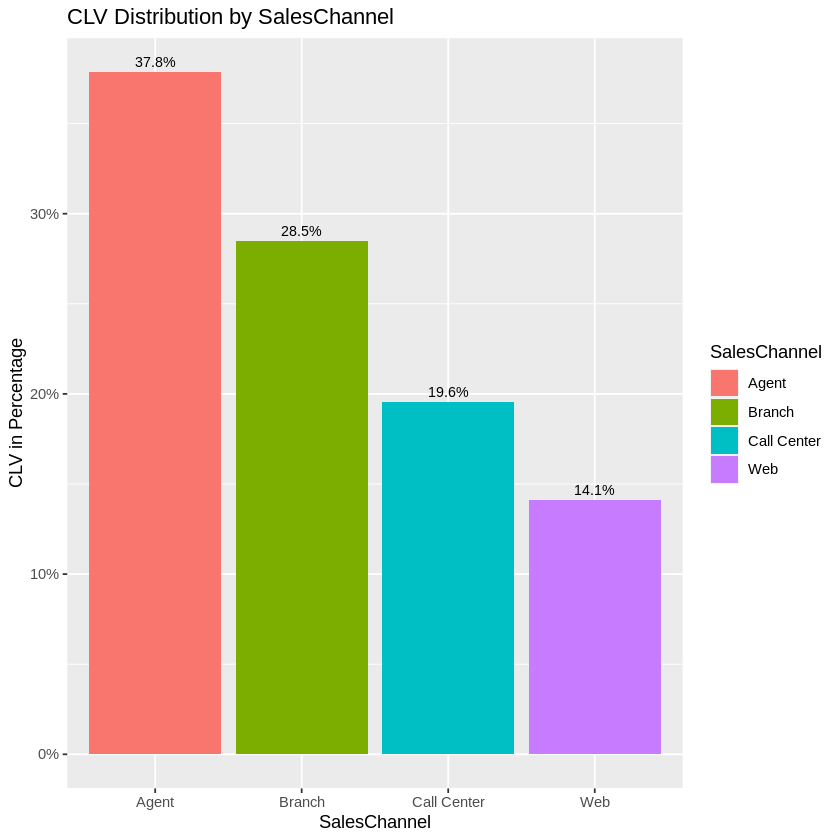

In [ ]:

ggplot(data = aggData, aes(x = SalesChannel, y = prop.table(stat(aggData$x)), fill = SalesChannel, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'SalesChannel', y = 'CLV in Percentage', fill = 'SalesChannel') + 
  ggtitle("CLV Distribution by SalesChannel")

Call Center is not performing well comparerd to other channels throughout the country (in terms of
high value customers)

**4.10 Effect of Vehicle Class on Customer Life Time Value (CLV)**

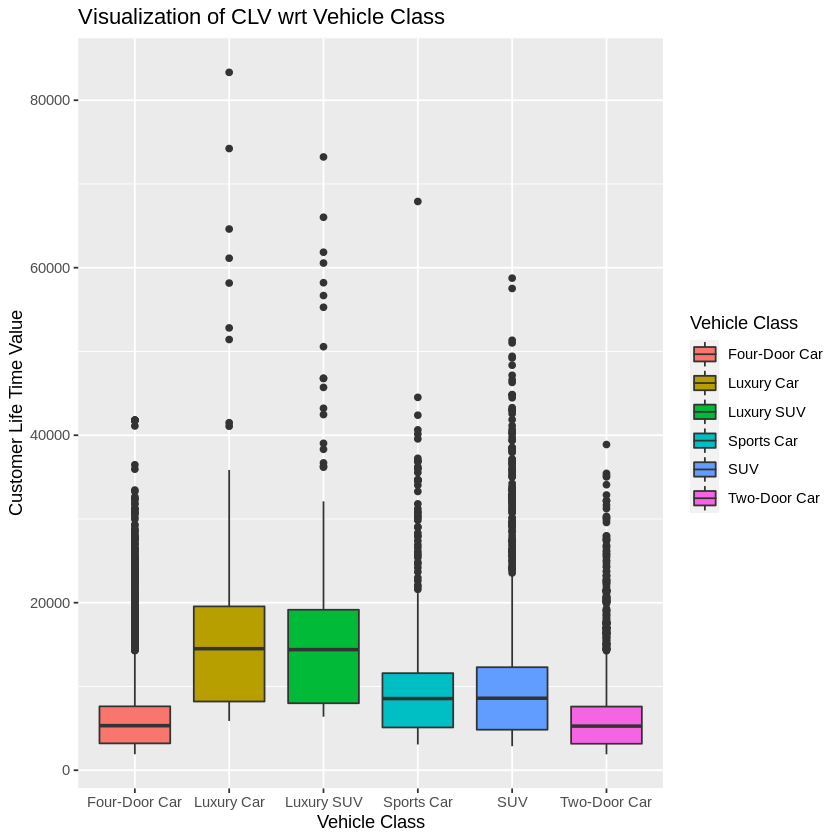

In [ ]:
ggplot(InsuranceData, aes(x=VehicleClass, y= CustomerLifetimeValue, fill = VehicleClass)) + 
  geom_boxplot() + 
  labs(x="Vehicle Class",y = "Customer Life Time Value", fill="Vehicle Class") + 
  ggtitle("Visualization of CLV wrt Vehicle Class")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(VehicleClass = InsuranceData$VehicleClass), FUN = sum)
print(aggData)

   VehicleClass        x
1 Four-Door Car 30645209
2    Luxury Car  2779696
3    Luxury SUV  3150632
4    Sports Car  5203479
5           SUV 18756547
6  Two-Door Car 12581564


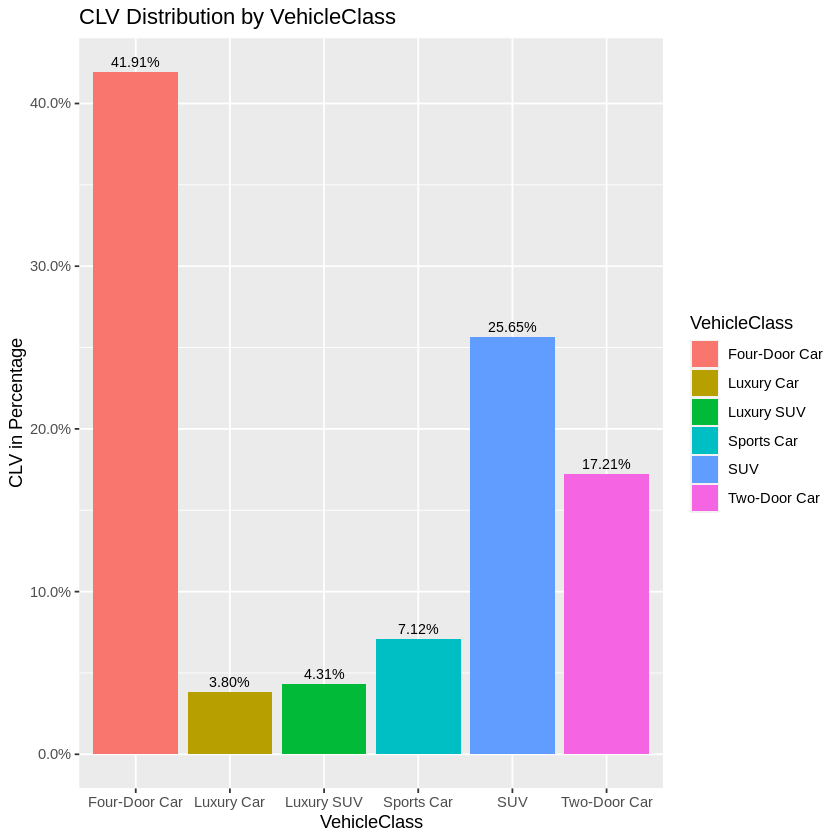

In [ ]:

ggplot(data = aggData, aes(x = VehicleClass, y = prop.table(stat(aggData$x)), fill = VehicleClass, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'VehicleClass', y = 'CLV in Percentage', fill = 'VehicleClass') + 
  ggtitle("CLV Distribution by VehicleClass")

Customers having Four-Door car and SUV are more valuable.

**4.11 Effect of Vehicle Size on Customer Life Time Value (CLV)**

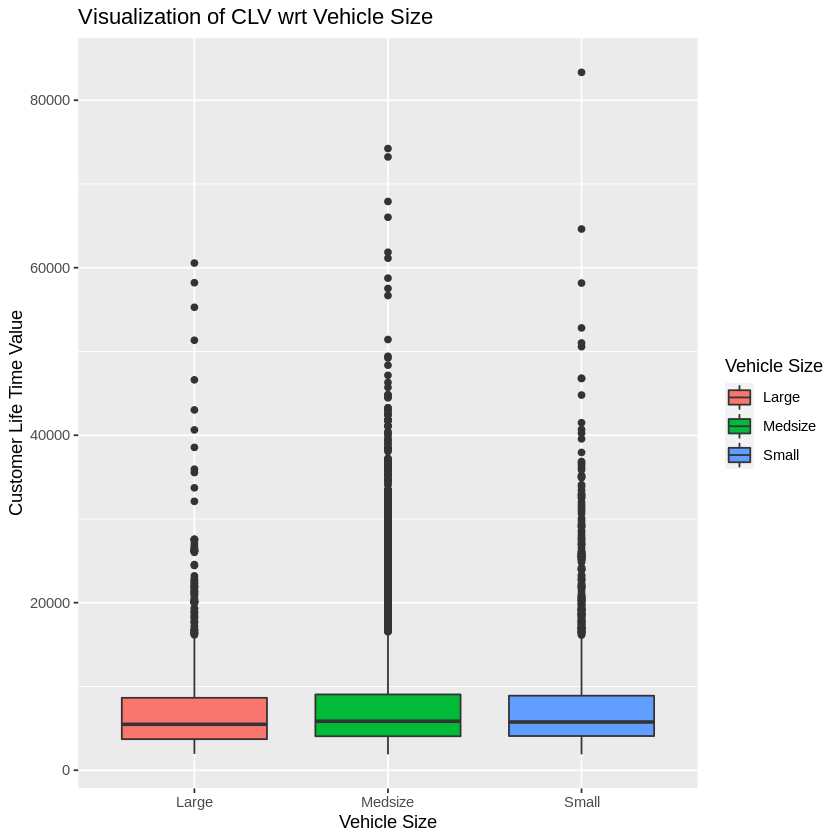

In [ ]:
ggplot(InsuranceData, aes(x=VehicleSize, y= CustomerLifetimeValue, fill = VehicleSize)) + 
  geom_boxplot() + 
  labs(x="Vehicle Size",y = "Customer Life Time Value", fill="Vehicle Size") + 
  ggtitle("Visualization of CLV wrt Vehicle Size")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(VehicleSize = InsuranceData$VehicleSize), FUN = sum)
print(aggData)

  VehicleSize        x
1       Large  7137566
2     Medsize 51717451
3       Small 14262109


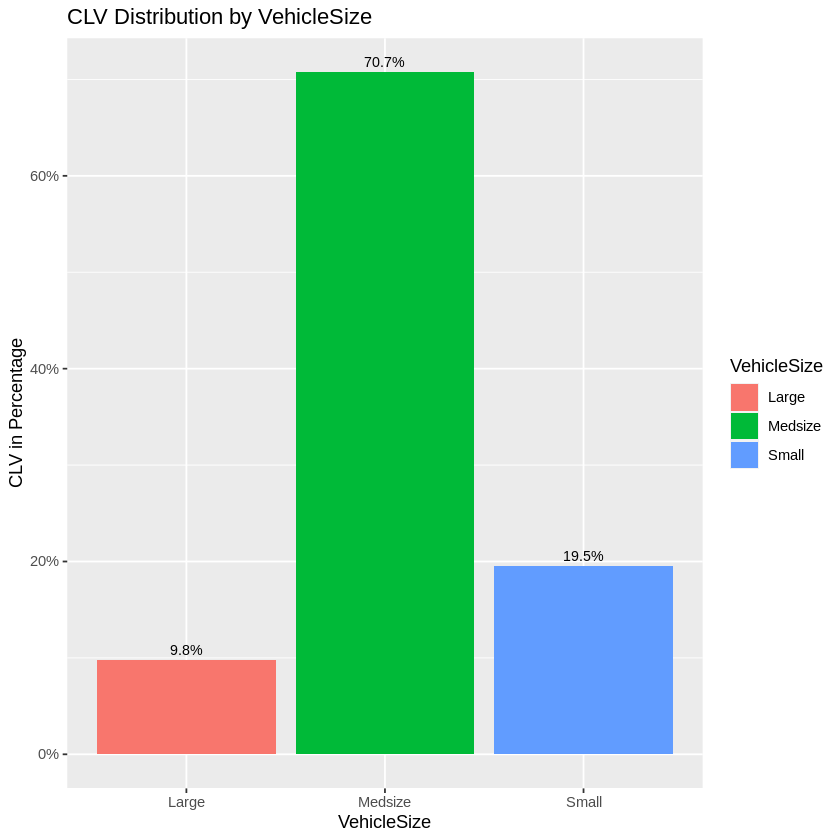

In [ ]:

ggplot(data = aggData, aes(x = VehicleSize, y = prop.table(stat(aggData$x)), fill = VehicleSize, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'VehicleSize', y = 'CLV in Percentage', fill = 'VehicleSize') + 
  ggtitle("CLV Distribution by VehicleSize")

Customers having Mid Size vehicals are adding more value to Insurance company.

**4.12 Effect of States on Customer Life Time Value (CLV)**

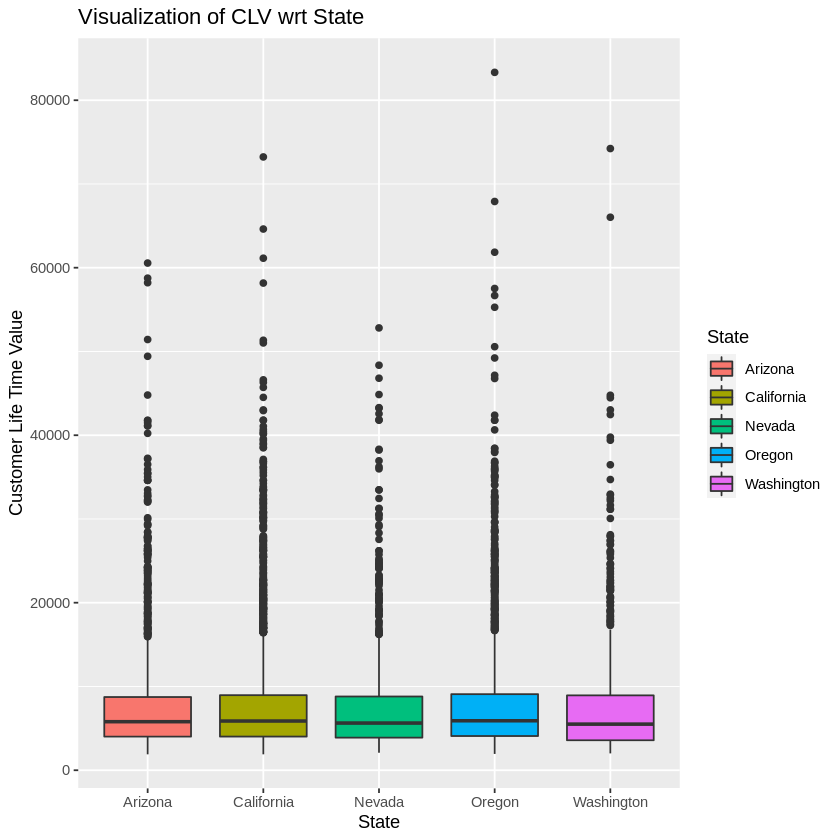

In [ ]:
ggplot(InsuranceData, aes(x=State, y= CustomerLifetimeValue, fill = State)) + 
  geom_boxplot() + 
  labs(x="State",y = "Customer Life Time Value", fill="State") + 
  ggtitle("Visualization of CLV wrt State")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(State = InsuranceData$State), FUN = sum)
print(aggData)

       State        x
1    Arizona 13387865
2 California 25211490
3     Nevada  7106015
4     Oregon 21010621
5 Washington  6401135


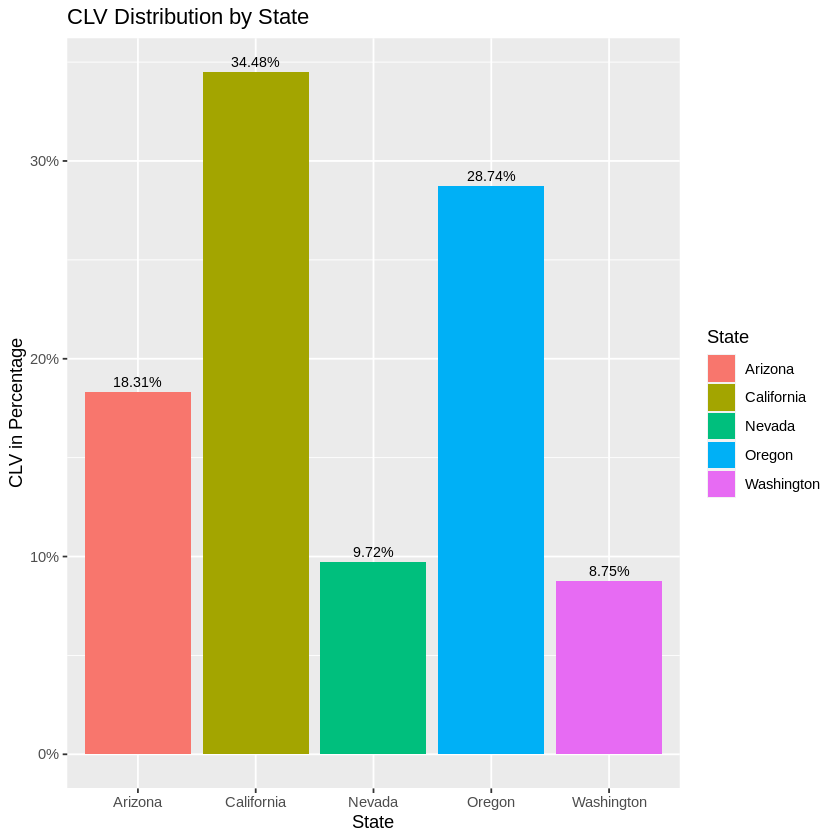

In [ ]:

ggplot(data = aggData, aes(x = State, y = prop.table(stat(aggData$x)), fill = State, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'State', y = 'CLV in Percentage', fill = 'State') + 
  ggtitle("CLV Distribution by State")

California customers are more valuable.

**4.13 Effect of Policy on Customer Life Time Value (CLV)**

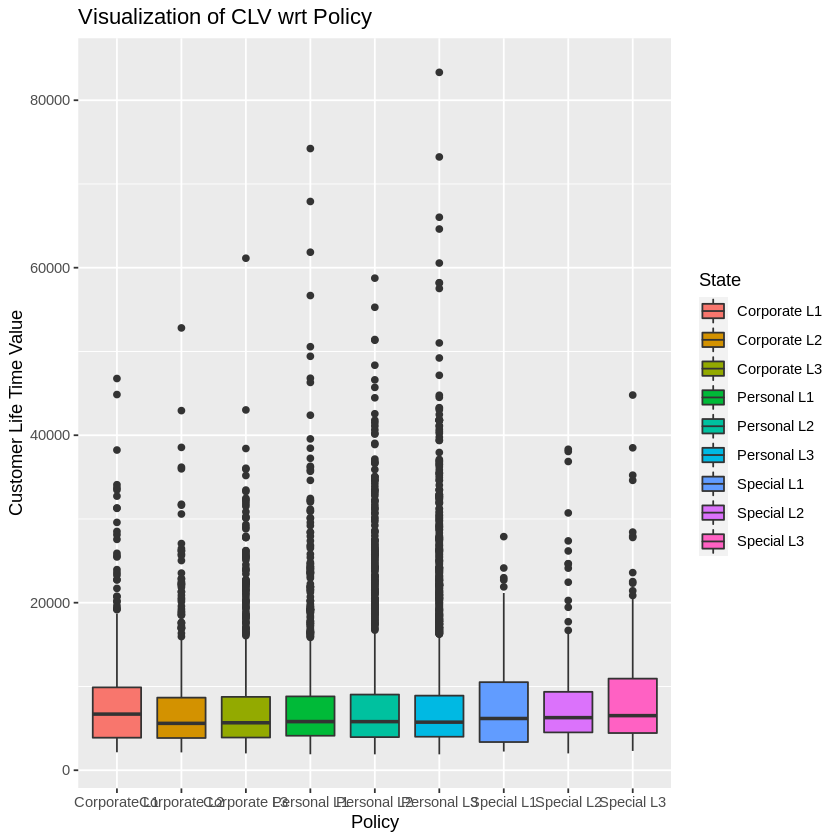

In [ ]:
ggplot(InsuranceData, aes(x=Policy, y= CustomerLifetimeValue, fill = Policy)) + 
  geom_boxplot() + 
  labs(x="Policy",y = "Customer Life Time Value", fill="State") + 
  ggtitle("Visualization of CLV wrt Policy")

In [ ]:
aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(Policy = InsuranceData$Policy), FUN = sum)
print(aggData)

        Policy          x
1 Corporate L1  3042499.2
2 Corporate L2  4520628.7
3 Corporate L3  7815630.1
4  Personal L1  9907304.9
5  Personal L2 17092517.6
6  Personal L3 27489921.1
7   Special L1   549962.4
8   Special L2  1365612.6
9   Special L3  1333049.6


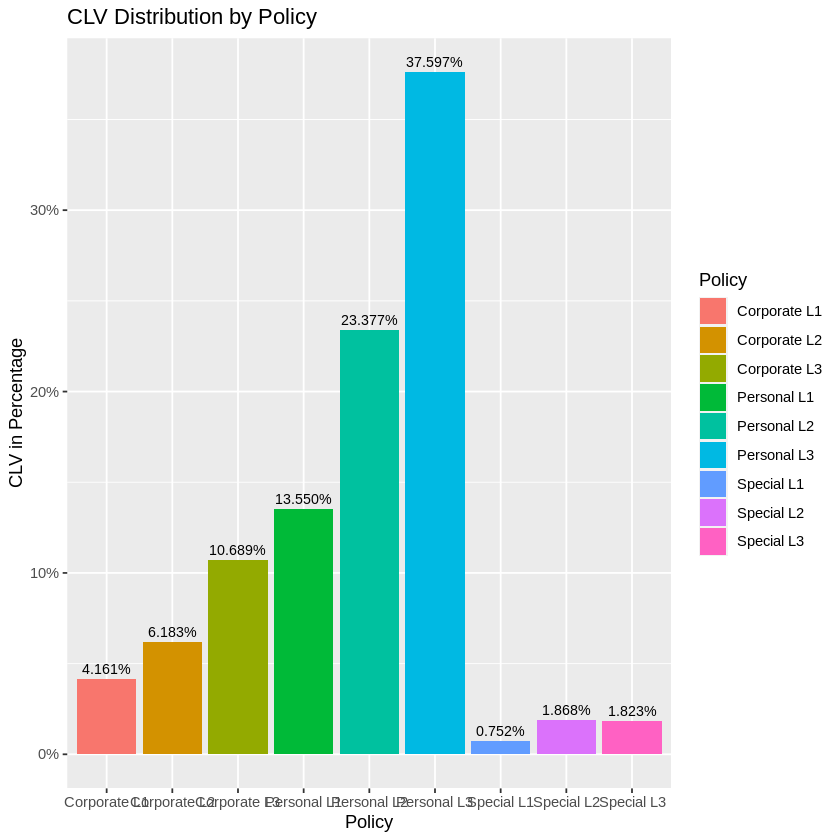

In [ ]:

ggplot(data = aggData, aes(x = Policy, y = prop.table(stat(aggData$x)), fill = Policy, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Policy', y = 'CLV in Percentage', fill = 'Policy') + 
  ggtitle("CLV Distribution by Policy")

Personal L3 Policy is adding more value to company.

# 5. Regression Analysis with Continuous Variables

In [ ]:
print(head(InsuranceData,2))

       State CustomerLifetimeValue Response Coverage Education EffectiveToDate
1 Washington              2763.519       No    Basic  Bachelor         2/24/11
2    Arizona              6979.536       No Extended  Bachelor         1/31/11
  EmploymentStatus Gender Income LocationCode MaritalStatus MonthlyPremiumAuto
1         Employed      F  56274     Suburban       Married                 69
2       Unemployed      F      0     Suburban        Single                 94
  MonthsSinceLastClaim MonthsSincePolicyInception NumberofOpenComplaints
1                   32                          5                      0
2                   13                         42                      0
  NumberofPolicies     PolicyType       Policy RenewOfferType SalesChannel
1                1 Corporate Auto Corporate L3         Offer1        Agent
2                8  Personal Auto  Personal L3         Offer3        Agent
  TotalClaimAmount  VehicleClass VehicleSize
1         384.8111  Two-Door Car     

1. Dependent Variable CLV is continuous and we have seen that independent variables are mostly depending linearly with dependent Variable, So Linear Regression algorithm is best for this type of this Data.
1. The goal of the Linear regression is to find the best fit line that can accurately predict the output for the continuous dependent variable.
1. Removing qualitative variables because Linear Regression works best when variables are quantitative/numeric in nature. We have only 8 continuous independed variables.

In [ ]:
summary(InsuranceData)

    State           CustomerLifetimeValue   Response           Coverage        
 Length:9134        Min.   : 1898         Length:9134        Length:9134       
 Class :character   1st Qu.: 3994         Class :character   Class :character  
 Mode  :character   Median : 5780         Mode  :character   Mode  :character  
                    Mean   : 8005                                              
                    3rd Qu.: 8962                                              
                    Max.   :83325                                              
  Education         EffectiveToDate    EmploymentStatus      Gender         
 Length:9134        Length:9134        Length:9134        Length:9134       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                       

In [ ]:
class(iris$Species)

[1] "factor"

In [ ]:
dataContinous <- dplyr::select_if(InsuranceData, ~!is.factor(.))
dataContinous

State      CustomerLifetimeValue Response Coverage Education           
1    Washington  2763.519             No       Basic    Bachelor            
2    Arizona     6979.536             No       Extended Bachelor            
3    Nevada     12887.432             No       Premium  Bachelor            
4    California  7645.862             No       Basic    Bachelor            
5    Washington  2813.693             No       Basic    Bachelor            
6    Oregon      8256.298             Yes      Basic    Bachelor            
7    Oregon      5380.899             Yes      Basic    College             
8    Arizona     7216.100             No       Premium  Master              
9    Oregon     24127.504             Yes      Basic    Bachelor            
10   Oregon      7388.178             No       Extended College             
11   California  4738.992             No       Basic    College             
12   California  8197.197             No       Basic    College             
13   California  8798.797             No       Premium  Master              
14   Arizona     8819.019             Yes      Basic    High School or Below
15   California  5384.432             No       Basic    College             
16   Oregon      7463.139             No       Basic    Bachelor            
17   Nevada      2566.868             No       Basic    High School or Below
18   California  3945.242             No       Basic    College             
19   Oregon      5710.333             No       Basic    College             
20   California  8162.617             No       Premium  High School or Below
21   Oregon      2872.051             No       Basic    High School or Below
22   Washington  3041.792             No       Extended Bachelor            
23   Arizona    24127.504             Yes      Basic    Bachelor            
24   Nevada      2450.191             No       Basic    Bachelor            
25   California  2392.108             No       Basic    Bachelor            
26   Oregon      5802.066             No       Basic    College             
27   California  3946.372             No       Premium  Bachelor            
28   Washington  5346.917             No       Extended Master              
29   Arizona    12902.560             No       Premium  College             
30   Oregon      3235.360             No       Extended Master              
⋮    ⋮          ⋮                     ⋮        ⋮        ⋮                   
9105 California  2615.139             No       Basic    College             
9106 California  5551.398             No       Extended College             
9107 California  6827.044             No       Basic    High School or Below
9108 California  5619.689             Yes      Premium  High School or Below
9109 California  3907.029             No       Basic    High School or Below
9110 California  3622.872             No       Basic    College             
9111 California 34611.379             Yes      Basic    High School or Below
9112 California  2845.521             No       Basic    Bachelor            
9113 California  5500.577             No       Extended College             
9114 California  3358.533             No       Extended Bachelor            
9115 California  7501.661             No       Extended High School or Below
9116 California 11663.986             No       Premium  College             
9117 California  5133.398             No       Basic    High School or Below
9118 California  8732.091             No       Basic    High School or Below
9119 California  9424.257             No       Basic    Master              
9120 California  5479.555             Yes      Basic    Master              
9121 California  2114.738             No       Basic    Bachelor            
9122 California  4140.649             No       Extended College             
9123 California 25464.821             Yes      Extended College             
9124 California  5678.050             Yes      Extended Bachelor            
9

In [ ]:
str(dataContinous)

'data.frame':	9134 obs. of  23 variables:
 $ State                     : chr  "Washington" "Arizona" "Nevada" "California" ...
 $ CustomerLifetimeValue     : num  2764 6980 12887 7646 2814 ...
 $ Response                  : chr  "No" "No" "No" "No" ...
 $ Coverage                  : chr  "Basic" "Extended" "Premium" "Basic" ...
 $ Education                 : chr  "Bachelor" "Bachelor" "Bachelor" "Bachelor" ...
 $ EffectiveToDate           : chr  "2/24/11" "1/31/11" "2/19/11" "1/20/11" ...
 $ EmploymentStatus          : chr  "Employed" "Unemployed" "Employed" "Unemployed" ...
 $ Gender                    : chr  "F" "F" "F" "M" ...
 $ Income                    : int  56274 0 48767 0 43836 62902 55350 0 14072 28812 ...
 $ LocationCode              : chr  "Suburban" "Suburban" "Suburban" "Suburban" ...
 $ MaritalStatus             : chr  "Married" "Single" "Married" "Married" ...
 $ MonthlyPremiumAuto        : int  69 94 108 106 73 69 67 101 71 93 ...
 $ MonthsSinceLastClaim      : int  32

In [ ]:
dim(dataContinous)

[1] 9134   23

**Following Steps followed to build the regression model:**
1. Split the Data in Training and Testing Set.
2. Training Dataset is for building Model and Testing Dataset to test the model on unlabeled data.
3. Build Linear Regression Model using all the continues indepedent variables.
4. Analysis the significance of the independent variable and if require rerun the model.

**Splitting the Data in Training and Testing Set.**

**Training set is for building Model and testing set to test the model on unlabelled data.**

In [ ]:
trainIndex <- createDataPartition(dataContinous$CustomerLifetimeValue, p=0.80, list = FALSE)
#print(trainIndex)
# 80% Train dataset for regression analysis
insurncTrain <- dataContinous[trainIndex,]
# Remaining 30% Test dataset for testing
insurncTest <- dataContinous[-trainIndex,]

In [ ]:
dim(dataContinous)

[1] 9134   23

In [ ]:
dim(insurncTrain)

[1] 7310   23

In [ ]:
dim(insurncTest)

[1] 1824   23

**Linear Regression**

In [ ]:
#Regression
#lm is used to fit linear models. It can be used to carry out regression, single stratum analysis of variance and analysis of covariance.

# Creating Linear Regression Model using all the continues indepedent variables.
fit <- lm(insurncTrain$CustomerLifetimeValue ~., data = insurncTrain) 
summary(fit) 



Call:
lm(formula = insurncTrain$CustomerLifetimeValue ~ ., data = insurncTrain)

Residuals:
   Min     1Q Median     3Q    Max 
-13395  -3267  -1328    784  61520 

Coefficients: (2 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2.746e+03  1.162e+03   2.364 0.018112 *  
StateCalifornia                8.051e+01  2.141e+02   0.376 0.706923    
StateNevada                    1.126e+02  2.919e+02   0.386 0.699814    
StateOregon                    1.232e+02  2.215e+02   0.556 0.578103    
StateWashington                3.454e+01  3.049e+02   0.113 0.909803    
ResponseYes                   -2.680e+02  2.361e+02  -1.135 0.256407    
CoverageExtended               1.841e+02  2.822e+02   0.652 0.514260    
CoveragePremium               -3.127e+01  5.970e+02  -0.052 0.958227    
EducationCollege              -1.652e+01  1.934e+02  -0.085 0.931931    
EducationDoctor               -3.206e+02  4.056e+

**5.1.1 Model Interpretation:**

**Null Hypothesis** - None of the independed variables are significant for CLV.

**Alternate Hypothesis** - At least one of the independent variables are significant and can effect the
CLV.

1. p-value of model is less than 0.05, so atleast one of the independent variables are significant.
1. p-value of MonthlyPremiumAuto, NumberofOpenComplaints and NumberofPolicies are less then 0.05, so rejecting the null hypothesis. So atlest one of them independed variables are significant and can effect the CLV.
1. However R squared is very low, only 16.02% of the variance found in the CLV can be explained by Income, MPA, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TCA.
1. Adjusted R squared is 0.1537 which is less than R squared.
1. Residual standard error is 6322 which is very very high, so it means the actual CLV will deviate from the true regression line by approximately 6322 on an average. The smaller the standard error, the less the spread and the more likely it is that any sample mean is close to the population mean. A small standard error is thus a Good Thing.
1. Gap between R-squared and Adjusted R-squared is 1.4% only, which is good. Typically the more non-significant variables you add into the model, the gap between two increases.
1. F-statistic: 6.958 - The lower the F-statistic, the closer to a non-significant model. So F-statistic is low means it is not very significant model.

**5.1.2. Rerun Model**


There are more than one insignificant variables in the model, so need to run the model again with only
significant variables.

In [ ]:
new_fit <- lm(insurncTrain$CustomerLifetimeValue ~ 
              MonthlyPremiumAuto + NumberofOpenComplaints + NumberofPolicies + TotalClaimAmount, 
              data = insurncTrain) 
summary(new_fit) 



Call:
lm(formula = insurncTrain$CustomerLifetimeValue ~ MonthlyPremiumAuto + 
    NumberofOpenComplaints + NumberofPolicies + TotalClaimAmount, 
    data = insurncTrain)

Residuals:
   Min     1Q Median     3Q    Max 
-12234  -3399  -1160    975  64529 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             582.8902   237.0544   2.459  0.01396 *  
MonthlyPremiumAuto       82.5687     2.7839  29.659  < 2e-16 ***
NumberofOpenComplaints -243.3489    81.1708  -2.998  0.00273 ** 
NumberofPolicies         75.0238    30.8056   2.435  0.01490 *  
TotalClaimAmount         -0.9108     0.3275  -2.781  0.00543 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6315 on 7305 degrees of freedom
Multiple R-squared:  0.1538,	Adjusted R-squared:  0.1533 
F-statistic: 331.9 on 4 and 7305 DF,  p-value: < 2.2e-16


The estimated regression line equation can be written as follow:


CLV = 582.9 + 82.6 MPA - 243.4 NoOC + 75.0 NoP - 0.9 TCA

**New Model Interpretation**


**Null Hypothesis** - None of the independed variables are significant for CLV.

**Alternate Hypothesis** – At least one of the independent variables are significant and can effect the
CLV.

1. p-value of MonthlyPremiumAuto, NumberofOpenComplaints, NumberofPolicies and TotalClaimAmount is less than 0.05 so they are significantly impact the CLV.
1. Coefficients of Independent Variables :-

    i. MonthlyPremiumAuto : 86.4478. One unit increase in MonthlyPremiumAuto will increase CLV by 86.4478

    ii. NumberofOpenComplaints : -199.3526. One unit increase in NumberofOpenComplaints will decrease CLV by 199.3526

    iii. NumberofPolicies : 76.3861. One unit increase in NumberofPolicies will increase CLV by 76.3861

    iv. TotalClaimAmount : -1.0445. one unit increase in TotalClaimAmount will decrease by 1.0445

1. So the customers having more number of policies with high monthly premium will add more value to company.
1. On the other hand, customer's Open Complaints and More Claim Amount will decrease the CLV.
1. R squared is 0.1656 which means 16.56% of dependent variable is explained by independ variable.
1. Adjusted R squared is 0.1652 which is less than R squared.

**Predict the value of CLV for all observations based on the above calculated regression model.**

In [ ]:
predictedCLV <- predict(new_fit)  
#print predicted CLV.
print(predictedCLV[1:10])

       1        2        4        5        6        7        9       10 
6004.673 7914.017 9377.729 6559.620 6285.013 6497.298 6129.721 8474.403 
      11       12 
5900.701 9409.622 


In [ ]:
#print actual CLV to compare it with above calculated predicted CLV.
print(insurncTrain$CustomerLifetimeValue[1:10])

 [1]  2763.519  6979.536  7645.862  2813.693  8256.298  5380.899 24127.504
 [8]  7388.178  4738.992  8197.197


** Calculate Error; Difference between actual CLV and predicted CLV**

In [ ]:
residualsCLV <- residuals(new_fit)
print(residualsCLV[1:10])

         1          2          4          5          6          7          9 
-3241.1534  -934.4806 -1731.8671 -3745.9270  1971.2852 -1116.3989 17997.7830 
        10         11         12 
-1086.2253 -1161.7087 -1212.4247 


**Model Validation on Test dataset**

In [ ]:
predicatedTestData=predict(new_fit,insurncTest)
print(predicatedTestData[1:10])

       3        8       17       26       33       35       37       38 
9134.421 8891.780 5776.296 6398.443 5894.267 6288.278 9881.976 8299.000 
      42       56 
6503.058 7923.880 


**Comparision between actual and predictied results.**

In [ ]:
InsuranceTrainData <- cbind(insurncTrain,predictedCLV,residualsCLV)
head(InsuranceTrainData)

State      CustomerLifetimeValue Response Coverage Education EffectiveToDate
1 Washington 2763.519              No       Basic    Bachelor  2/24/11        
2 Arizona    6979.536              No       Extended Bachelor  1/31/11        
4 California 7645.862              No       Basic    Bachelor  1/20/11        
5 Washington 2813.693              No       Basic    Bachelor  2/3/11         
6 Oregon     8256.298              Yes      Basic    Bachelor  1/25/11        
7 Oregon     5380.899              Yes      Basic    College   2/24/11        
  EmploymentStatus Gender Income LocationCode ⋯ NumberofPolicies PolicyType    
1 Employed         F      56274  Suburban     ⋯ 1                Corporate Auto
2 Unemployed       F          0  Suburban     ⋯ 8                Personal Auto 
4 Unemployed       M          0  Suburban     ⋯ 7                Corporate Auto
5 Employed         M      43836  Rural        ⋯ 1                Personal Auto 
6 Employed         F      62902  Rural        ⋯ 2                Personal Auto 
7 Employed         F      55350  Suburban     ⋯ 9                Corporate Auto
  Policy       RenewOfferType SalesChannel TotalClaimAmount VehicleClass 
1 Corporate L3 Offer1         Agent         384.8111        Two-Door Car 
2 Personal L3  Offer3         Agent        1131.4649        Four-Door Car
4 Corporate L2 Offer1         Call Center   529.8813        SUV          
5 Personal L1  Offer1         Agent         138.1309        Four-Door Car
6 Personal L3  Offer2         Web           159.3830        Two-Door Car 
7 Corporate L3 Offer1         Agent         321.6000        Four-Door Car
  VehicleSize predictedCLV residualsCLV
1 Medsize     6004.673     -3241.1534  
2 Medsize     7914.017      -934.4806  
4 Medsize     9377.729     -1731.8671  
5 Medsize     6559.620     -3745.9270  
6 Medsize     6285.013      1971.2852  
7 Medsize     6497.298     -1116.3989

**Calculating error rate or MAPE**

In [ ]:
ErrorRate <- abs((InsuranceTrainData$CustomerLifetimeValue - InsuranceTrainData$predictedCLV)/(InsuranceTrainData$CustomerLifetimeValue)*100)
print(ErrorRate[1:10])
# https://www.google.com/search?q=Mean+absolute+percentage+error&sxsrf=ALeKk02X26zal51HgIlirD3K7AOLT9Y-eg:1626510605061&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjCv9mW2OnxAhVn4jgGHdyrCwoQ_AUoAXoECAEQAw&biw=1440&bih=821#imgrc=d1PHxYJErdaeBM

 [1] 117.28355  13.38886  22.65104 133.13206  23.87614  20.74744  74.59447
 [8]  14.70221  24.51383  14.79072


In [ ]:
InsuranceTrainData <- cbind(InsuranceTrainData, ErrorRate)
head(InsuranceTrainData)

State      CustomerLifetimeValue Response Coverage Education EffectiveToDate
1 Washington 2763.519              No       Basic    Bachelor  2/24/11        
2 Arizona    6979.536              No       Extended Bachelor  1/31/11        
4 California 7645.862              No       Basic    Bachelor  1/20/11        
5 Washington 2813.693              No       Basic    Bachelor  2/3/11         
6 Oregon     8256.298              Yes      Basic    Bachelor  1/25/11        
7 Oregon     5380.899              Yes      Basic    College   2/24/11        
  EmploymentStatus Gender Income LocationCode ⋯ PolicyType     Policy      
1 Employed         F      56274  Suburban     ⋯ Corporate Auto Corporate L3
2 Unemployed       F          0  Suburban     ⋯ Personal Auto  Personal L3 
4 Unemployed       M          0  Suburban     ⋯ Corporate Auto Corporate L2
5 Employed         M      43836  Rural        ⋯ Personal Auto  Personal L1 
6 Employed         F      62902  Rural        ⋯ Personal Auto  Personal L3 
7 Employed         F      55350  Suburban     ⋯ Corporate Auto Corporate L3
  RenewOfferType SalesChannel TotalClaimAmount VehicleClass  VehicleSize
1 Offer1         Agent         384.8111        Two-Door Car  Medsize    
2 Offer3         Agent        1131.4649        Four-Door Car Medsize    
4 Offer1         Call Center   529.8813        SUV           Medsize    
5 Offer1         Agent         138.1309        Four-Door Car Medsize    
6 Offer2         Web           159.3830        Two-Door Car  Medsize    
7 Offer1         Agent         321.6000        Four-Door Car Medsize    
  predictedCLV residualsCLV ErrorRate
1 6004.673     -3241.1534   117.28355
2 7914.017      -934.4806    13.38886
4 9377.729     -1731.8671    22.65104
5 6559.620     -3745.9270   133.13206
6 6285.013      1971.2852    23.87614
7 6497.298     -1116.3989    20.74744

**Calculating mean of error rate**

In [ ]:
mean(InsuranceTrainData$ErrorRate, na.rm = TRUE)

[1] 60.43577

Average error rate of model is 60.43%, which is high and we can say that model is not so good.

**5.2. Residuals Analysis**

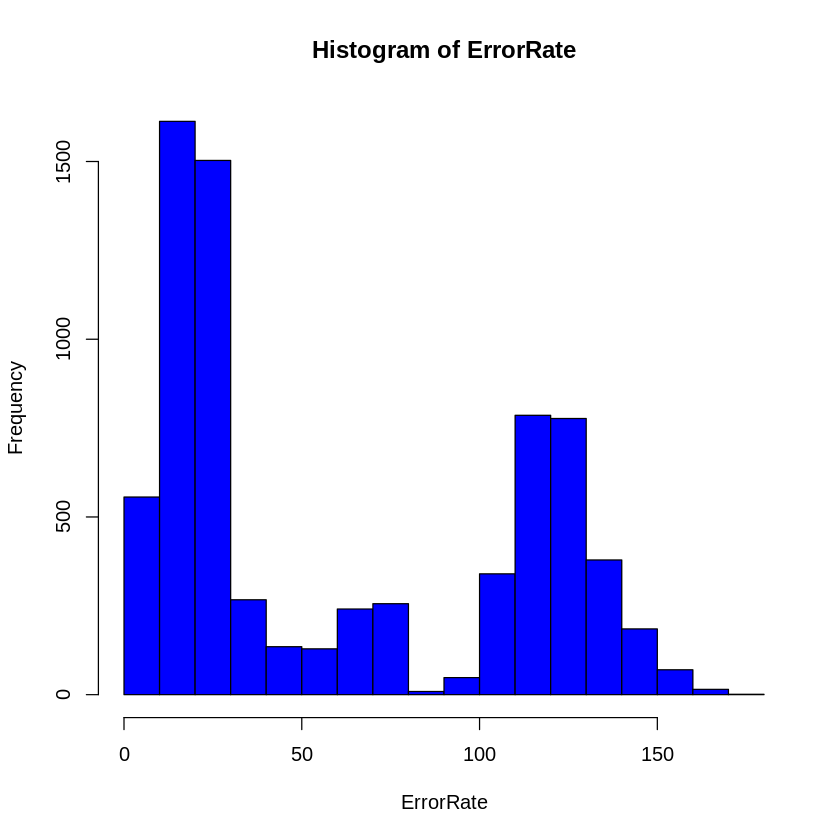

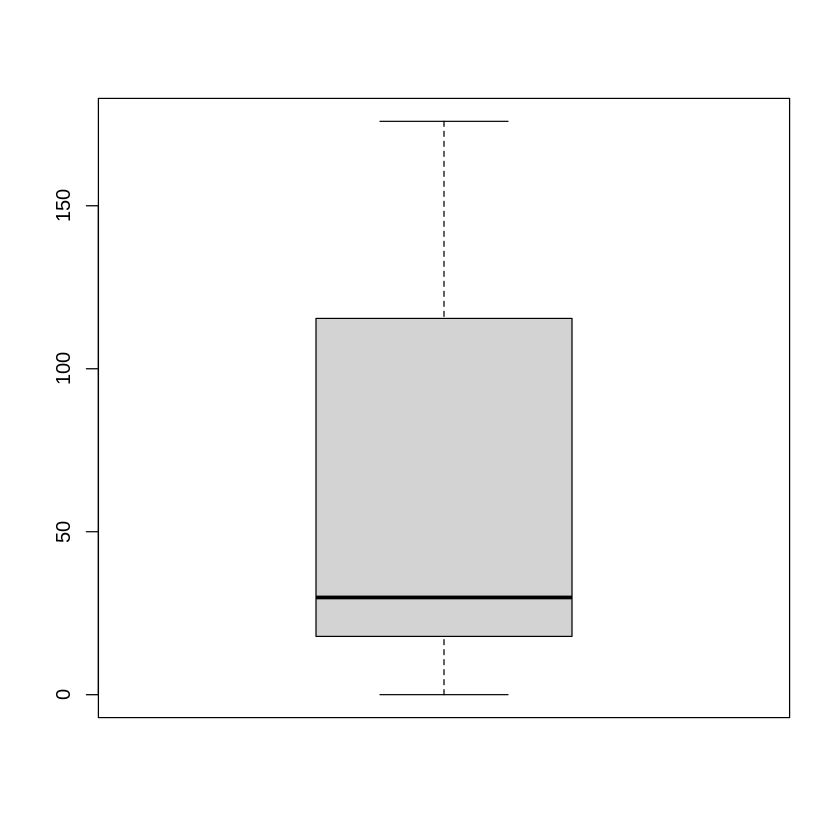

In [ ]:
hist(ErrorRate, col = "blue")
boxplot(ErrorRate)

**Check the normality of Error/Residual Term (Linear Regression assumes that error are normally distributed.)**


**Null Hypotheses** - Errors are normally distributed. 

**Alt Hypothese** - Errors are not normally distributed.

In [ ]:
shapiro.test(residualsCLV[0:5000])


	Shapiro-Wilk normality test

data:  residualsCLV[0:5000]
W = 0.72712, p-value < 2.2e-16


p-value(0.00837) < 0.05, Null Hypotheses get rejected, and so the errors are not normally distributed.

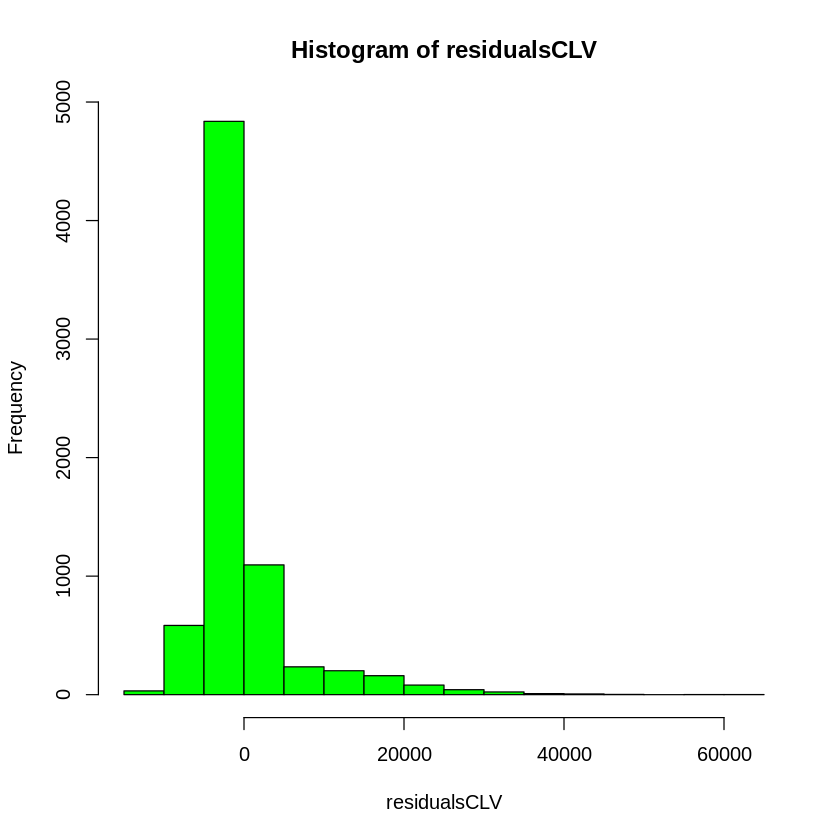

In [ ]:
hist(residualsCLV,col = "green")

**Residuals vs Fitted Plot**

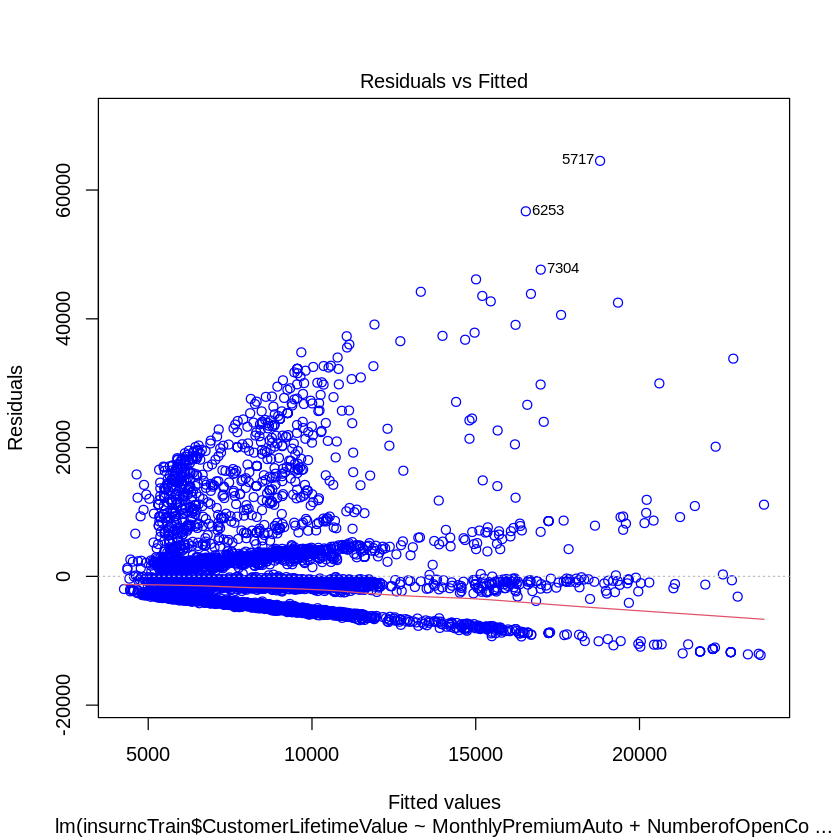

In [ ]:
plot(new_fit, which=1, col=c("blue"))

# 6. Assumption Testing of Linear Regression Analysis

**1. Detecting multicollinearity** - checking correlation between independent variables.

In our model, only those independent variable should exist which are not correlated with each other.
This is done using Correlation Matrix.

In [ ]:
head(InsuranceTrainData)

State      CustomerLifetimeValue Response Coverage Education EffectiveToDate
1 Washington 2763.519              No       Basic    Bachelor  2/24/11        
2 Arizona    6979.536              No       Extended Bachelor  1/31/11        
4 California 7645.862              No       Basic    Bachelor  1/20/11        
5 Washington 2813.693              No       Basic    Bachelor  2/3/11         
6 Oregon     8256.298              Yes      Basic    Bachelor  1/25/11        
7 Oregon     5380.899              Yes      Basic    College   2/24/11        
  EmploymentStatus Gender Income LocationCode ⋯ PolicyType     Policy      
1 Employed         F      56274  Suburban     ⋯ Corporate Auto Corporate L3
2 Unemployed       F          0  Suburban     ⋯ Personal Auto  Personal L3 
4 Unemployed       M          0  Suburban     ⋯ Corporate Auto Corporate L2
5 Employed         M      43836  Rural        ⋯ Personal Auto  Personal L1 
6 Employed         F      62902  Rural        ⋯ Personal Auto  Personal L3 
7 Employed         F      55350  Suburban     ⋯ Corporate Auto Corporate L3
  RenewOfferType SalesChannel TotalClaimAmount VehicleClass  VehicleSize
1 Offer1         Agent         384.8111        Two-Door Car  Medsize    
2 Offer3         Agent        1131.4649        Four-Door Car Medsize    
4 Offer1         Call Center   529.8813        SUV           Medsize    
5 Offer1         Agent         138.1309        Four-Door Car Medsize    
6 Offer2         Web           159.3830        Two-Door Car  Medsize    
7 Offer1         Agent         321.6000        Four-Door Car Medsize    
  predictedCLV residualsCLV ErrorRate
1 6004.673     -3241.1534   117.28355
2 7914.017      -934.4806    13.38886
4 9377.729     -1731.8671    22.65104
5 6559.620     -3745.9270   133.13206
6 6285.013      1971.2852    23.87614
7 6497.298     -1116.3989    20.74744

In [ ]:
InsuranceTrainData %>% dplyr::select(where(is.numeric))

CustomerLifetimeValue Income MonthlyPremiumAuto MonthsSinceLastClaim
1     2763.519             56274   69                32                  
2     6979.536                 0   94                13                  
4     7645.862                 0  106                18                  
5     2813.693             43836   73                12                  
6     8256.298             62902   69                14                  
7     5380.899             55350   67                 0                  
9    24127.504             14072   71                13                  
10    7388.178             28812   93                17                  
11    4738.992                 0   67                23                  
12    8197.197                 0  110                27                  
13    8798.797             77026  110                 9                  
14    8819.019             99845  110                23                  
15    5384.432             83689   70                21                  
16    7463.139             24599   64                12                  
18    3945.242             28855  101                12                  
19    5710.333             51148   72                 9                  
20    8162.617             66140  101                11                  
21    2872.051             57749   74                31                  
22    3041.792             13789   79                 8                  
23   24127.504             14072   71                13                  
24    2450.191                 0   73                 4                  
25    2392.108             17870   61                30                  
27    3946.372                 0  111                15                  
28    5346.917             10511  139                33                  
29   12902.560             86584  111                33                  
30    3235.360             75690   80                17                  
31    2454.584             23158   63                 4                  
32   18975.456             65999  237                 1                  
34    5018.885             54500   63                28                  
36    5744.230             68987   71                11                  
⋮    ⋮                     ⋮      ⋮                  ⋮                   
9092  5878.447             25398   74                23                  
9093  4547.322             29031   61                 7                  
9094  5926.385             92949   74                21                  
9095  4873.673                 0   68                 3                  
9096  2580.850             46900   66                13                  
9097  7083.642             97024  177                 0                  
9098 30104.520                 0   94                15                  
9099  4148.570             61896  104                25                  
9101  3843.965             43987   96                29                  
9103  2619.337             78618   66                 7                  
9106  5551.398             36918   76                28                  
9107  6827.044                 0  102                 5                  
9108  5619.689                 0  153                25                  
9109  3907.029                 0  109                 2                  
9110  3622.872                 0  108                23                  
9111 34611.379             20090  109                10                  
9113  5500.577             44019  138                20                  
9114  3358.533             59367   84                 6                  
9115  7501.661             38874   94                 6                  
9116 11663.986                 0  107                12                  
9118  8732.091             51205   72                 4                  
9119  9424.257             46897  118                13                  
9121  211

In [ ]:
cor(InsuranceTrainData %>% dplyr::select(where(is.numeric)))

CustomerLifetimeValue Income      
CustomerLifetimeValue       1.000000000           0.017042971
Income                      0.017042971           1.000000000
MonthlyPremiumAuto          0.388818334          -0.025274778
MonthsSinceLastClaim        0.004029211          -0.034218309
MonthsSincePolicyInception  0.013049358           0.003722028
NumberofOpenComplaints     -0.037262886          -0.001833022
NumberofPolicies            0.019765634          -0.010748363
TotalClaimAmount            0.224206556          -0.357054382
predictedCLV                0.392143821           0.008078440
residualsCLV                0.919903921           0.015083162
ErrorRate                  -0.268667182          -0.066312890
                           MonthlyPremiumAuto MonthsSinceLastClaim
CustomerLifetimeValue       3.888183e-01       0.004029211        
Income                     -2.527478e-02      -0.034218309        
MonthlyPremiumAuto          1.000000e+00       0.006807046        
MonthsSinceLastClaim        6.807046e-03       1.000000000        
MonthsSincePolicyInception  3.080209e-02      -0.035410807        
NumberofOpenComplaints     -1.353802e-02       0.010292630        
NumberofPolicies           -1.589350e-02       0.016469080        
TotalClaimAmount            6.353086e-01       0.016286611        
predictedCLV                9.915197e-01       0.005820589        
residualsCLV               -1.690628e-17       0.001898788        
ErrorRate                  -3.022144e-02      -0.010800626        
                           MonthsSincePolicyInception NumberofOpenComplaints
CustomerLifetimeValue       0.0130493583              -3.726289e-02         
Income                      0.0037220278              -1.833022e-03         
MonthlyPremiumAuto          0.0308020895              -1.353802e-02         
MonthsSinceLastClaim       -0.0354108069               1.029263e-02         
MonthsSincePolicyInception  1.0000000000              -1.512752e-03         
NumberofOpenComplaints     -0.0015127524               1.000000e+00         
NumberofPolicies           -0.0067767897               2.435735e-03         
TotalClaimAmount            0.0048827332              -1.396386e-02         
predictedCLV                0.0316623551              -9.502352e-02         
residualsCLV                0.0006882908               3.490308e-18         
ErrorRate                   0.0021461456              -2.816009e-02         
                           NumberofPolicies TotalClaimAmount predictedCLV 
CustomerLifetimeValue       1.976563e-02     2.242066e-01     3.921438e-01
Income                     -1.074836e-02    -3.570544e-01     8.078440e-03
MonthlyPremiumAuto         -1.589350e-02     6.353086e-01     9.915197e-01
MonthsSinceLastClaim        1.646908e-02     1.628661e-02     5.820589e-03
MonthsSincePolicyInception -6.776790e-03     4.882733e-03     3.166236e-02
NumberofOpenComplaints      2.435735e-03    -1.396386e-02    -9.502352e-02
NumberofPolicies            1.000000e+00    -5.132976e-03     5.040404e-02
TotalClaimAmount           -5.132976e-03     1.000000e+00     5.717457e-01
predictedCLV                5.040404e-02     5.717457e-01     1.000000e+00
residualsCLV               -8.778040e-18     2.808302e-17    -5.827335e-17
ErrorRate                  -6.647980e-01    -7.090799e-03    -7.328688e-02
                           residualsCLV  ErrorRate   
CustomerLifetimeValue       9.199039e-01 -0.268667182
Income                      1.508316e-02 -0.066312890
MonthlyPremiumAuto         -1.690628e-17 -0.030221436
MonthsSinceLastClaim        1.898788e-03 -0.010800626
MonthsSincePolicyInception  6.882908e-04  0.002146146
NumberofOpenComplaints      3.490308e-18 -0.028160091
NumberofPolicies           -8.778040e-18 -0.664798031
TotalClaimAmount            2.808302e-17 -0.007090799
predictedCLV               -5.827335e-17 -0.073286884
residualsCLV                1.000000e+00 -0.260818742
ErrorRate                  -2.608187e-01  1.000000000

In [ ]:
# Variance Inflation Factors
print(car::vif(new_fit))

    MonthlyPremiumAuto NumberofOpenComplaints       NumberofPolicies 
              1.677284               1.000237               1.000299 
      TotalClaimAmount 
              1.676925 


Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. 

If there is high correlation between two independed variables (high multicollinearity), then you will not be able to seperate out the impact of individual independed variable on depended variable.

Due to multicolinearity we can't define the complete impact of only one independed variable on the depended variable.


**2. Detecting Homoscedasticity** - variance for all observations are not the same

**Null Hypothesis** - Homoscedasticity is present in Residuals.

**Alternate hypothesis** - Heteroskedasticity is present in residuals.

This is done by Breusch-Pagan test.

In [ ]:
bptest(new_fit)


	studentized Breusch-Pagan test

data:  new_fit
BP = 406.15, df = 4, p-value < 2.2e-16


p-value < 0.05, so it rejects that errors are homoscedasticity. 
So errors terms are heteroscedasticity and does not have contant variance which is not good for model.

**3. Detecting Autocorrelation** - checking autocorrelation (Checking correlation between errors)

This is done Durbin-Watson Test
If D-W Statistic is around 2, then we have autocorrelation in model. and away from 2 means no
autocorrelation.

In [ ]:
dwt(new_fit)

 lag Autocorrelation D-W Statistic p-value
   1    -0.009401311      2.018765   0.446
 Alternative hypothesis: rho != 0

Here D-W Statistic is 2.01194, so there is autocorrelation in the model.

**4. Detecting MAPE** - Mean Absolute Percentage Error Loss

MAPE computes the average absolute percent difference between two numeric vectors.

In [ ]:
ErrorRate <- mean(abs((InsuranceTrainData$CustomerLifetimeValue - InsuranceTrainData$predictedCLV)/InsuranceTrainData$CustomerLifetimeValue) *100 )
print(ErrorRate)

[1] 60.43577


Average error rate of model is 60.43%, which is high and we can say that model is not so good.

# 7. Prediction Curve

Blue line show the regression line and red dot shoes the actual observations deviated from the
regression line.

**1. Prediction Curve with MonthlyPremiumAuto**

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
`geom_smooth()` using formula 'y ~ x'



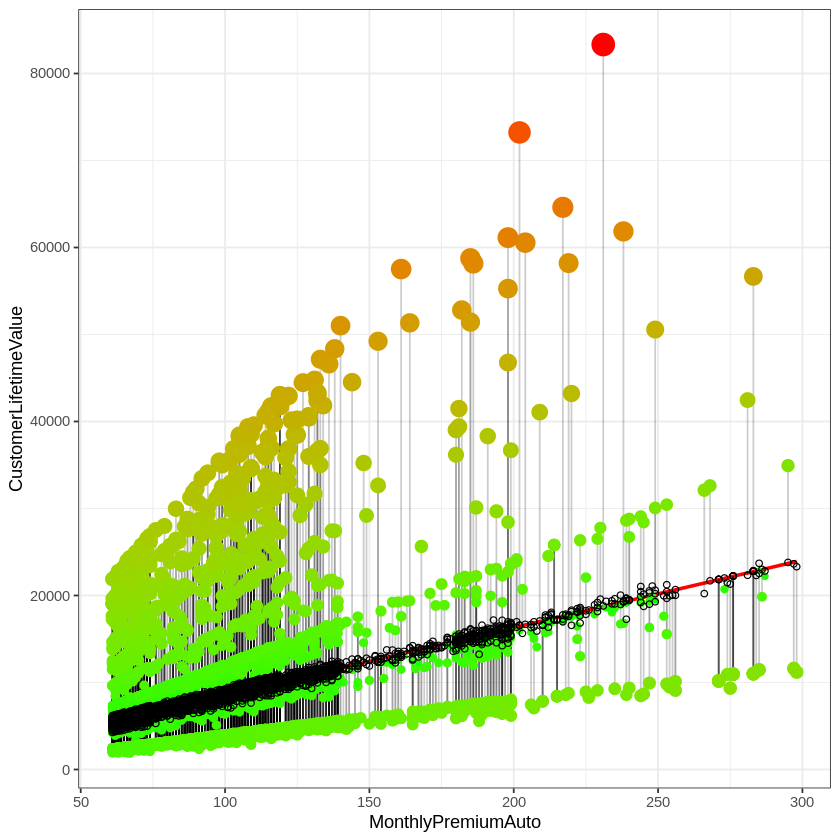

In [ ]:
ggplot(InsuranceTrainData, aes(x = MonthlyPremiumAuto, y = CustomerLifetimeValue)) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +     # regression line  
  geom_segment(aes(xend = MonthlyPremiumAuto, yend = predictedCLV), alpha = .2) +      # draw line from point to line
  geom_point(aes(color = abs(residualsCLV), size = abs(residualsCLV))) +  # size of the points
  scale_color_continuous(low = "green", high = "red") +             # colour of the points mapped to residual size - green smaller, red larger
  guides(color = FALSE, size = FALSE) +                             # Size legend removed
  geom_point(aes(y = predictedCLV), shape = 1) +
  theme_bw()

`geom_smooth()` using formula 'y ~ x'



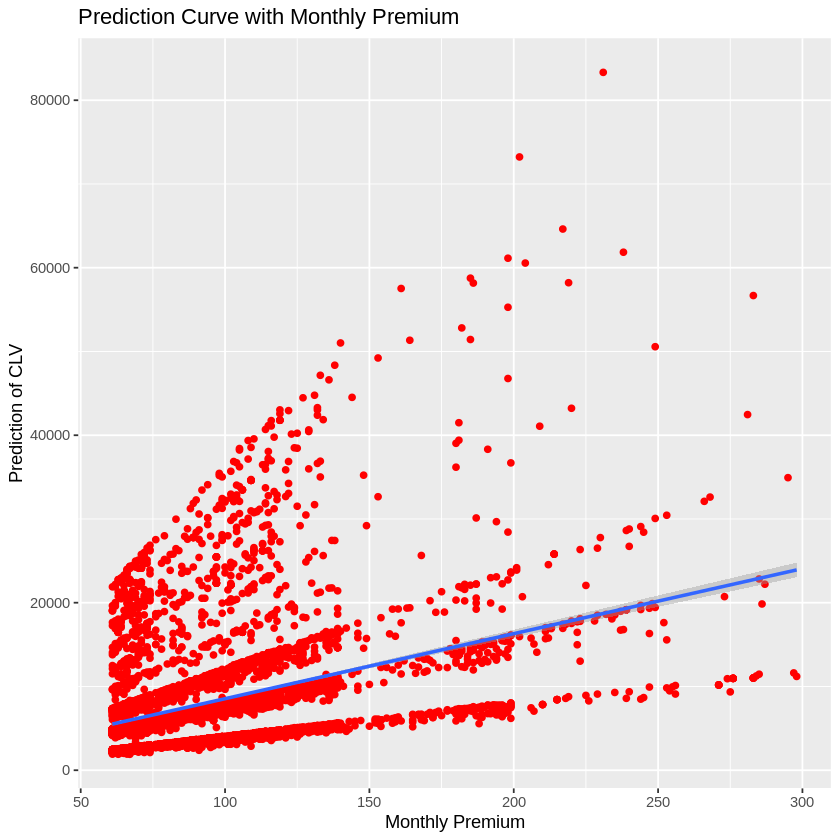

In [ ]:
ggplot(InsuranceTrainData,aes(x=MonthlyPremiumAuto,y=CustomerLifetimeValue))+
  geom_point(color="red")+
  stat_smooth(method="lm")+
  scale_x_continuous(name="Monthly Premium")+
  scale_y_continuous(name="Prediction of CLV")+
  ggtitle("Prediction Curve with Monthly Premium")

**2. Prediction Curve with TotalClaimAmount**

`geom_smooth()` using formula 'y ~ x'



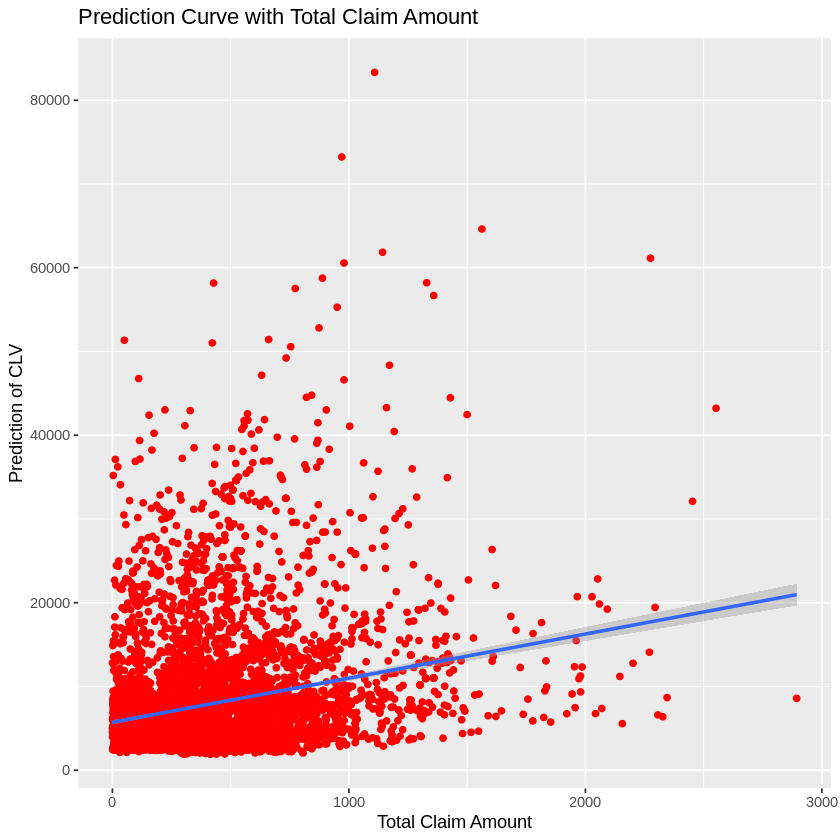

In [ ]:
ggplot(InsuranceTrainData,aes(x=TotalClaimAmount,y=CustomerLifetimeValue))+
  geom_point(color="red")+
  stat_smooth(method="lm")+
  scale_x_continuous(name="Total Claim Amount")+
  scale_y_continuous(name="Prediction of CLV")+
  ggtitle("Prediction Curve with Total Claim Amount")

# 8. Summary

1. There are a lot of Customers with low CLV. Very few customers with high CLV.
1. Customers who have taken Basic Insurance for their vehicle are more valuable then Extended or Premium Insurance Policy holders.
1. Educated Employed customers (with a bachelors or equivalent degree) are more valuable than Retired, Unemployed or Disabled Customers.
1. Gender has no role to play in determining the value of a customer. Both Male and Female looks valuable.
1. Marital customers are buying more auto insurance and adding more value to company.
1. Rural customers are LESS valuable than Urban customers.
1. Customers having their own Personal Policy are more valuable to company then Corporate and Special Insurance policy holder.
1. Offers 1 and Offer 2 attracts more customers.
1. Call Center is not performing well compared to other channels throughout the country (in terms of high value customers)
1. Customers having Mid Size vehicles, Four-Door car or SUV are more valuable.
1. California customers are adding more value to the company.
1. Personal L3 Policy is adding more value to company.xiii.
1. The customers having more number of policies with high monthly premium will add more value to company. On the other hand, customer's Open Complaints and More Claim Amount will decrease the CLV.

# 9. Business Recommendation

This report represents my analysis for the XYZ Insurance company. It is my opinion that
based on the data provided, targeting appropriate customers could increase the Customer
Lifetime Value. The two proposed changes are as follows:

A) Insurance company should target educated married employed customers from
Urban areas having Mid Size vehicles to increase the Customer Lifetime Value
(CLV) increase.

B) On the other hand, if customer's Open Complaints would not be resolved soon and
claim amount would not bring down, then both could decrease the Customer
Lifetime Value (CLV).

C) About 38% value was added by the agents to the company whereas call centers
added only 20% value. So agents should be preferred over call centers while
selling the auto insurance to customers.

D) Factors which are responsible for increasing the CLV are Monthly Premium and
Number of Policies, however Open Complaints and Claim Amount can decrease
the CLV.

# Happy Learning